# Manim community 0.17 in sage 10.1 examples

Arvid Lundervold, 2022-05-28; 2022-10-26. (SageMath 9.7); 2022-11-14; 2023-08-21 (Ubuntu 2022.04)

Manim (https://github.com/ManimCommunity/manim) is an animation engine for explanatory math videos. It's used to create precise animations programmatically, as demonstrated in the videos of [3Blue1Brown](https://www.3blue1brown.com) (on YouTube [here](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)).

> NOTE: This repository is maintained by the Manim Community and is not associated with Grant Sanderson or 3Blue1Brown in any way (although we are definitely indebted to him for providing his work to the world). If you would like to study how Grant makes his videos, head over to his repository (3b1b/manim). This fork is updated more frequently than his, and it's recommended to use this fork if you'd like to use Manim for your own projects.


### Installing Manim locally
Manim is a Python library, and it can be installed via pip. However, in order for Manim to work properly, some additional system dependencies need to be installed first. The following pages have operating system specific instructions for you to follow.

Manim is only compatible with Python versions 3.7–3.9, but not 3.10 for now.

Required Dependencies (Ubuntu):

```
sudo apt update
sudo apt install libcairo2-dev libpango1.0-dev ffmpeg
```

Required Dependencies (MacOS):

```
brew install cmake pango scipy
```



To install the python package `manim` in the sage kernel:

```
> sage --pip install manim
```

### Some help:

- https://docs.manim.community/en/stable/tutorials/quickstart.html

In [2]:
from manim import *

**ManimMagic**: `manim(line, cell=None, local_ns=None)`

```
%%manim [CLI options] MyAwesomeScene

class MyAweseomeScene(Scene):
    def construct(self):
        ...
```

This line and cell magic works best when used in a JupyterLab environment: while all of the functionality is available for classic Jupyter notebooks as well, it is possible that videos sometimes don’t update on repeated execution of the same cell if the scene name stays the same.

This problem does not occur when using JupyterLab.

> Run `%manim --help` and `%manim render --help` for possible command line interface options.

In [3]:
%manim --help

Usage: manim [OPTIONS] COMMAND [ARGS]...

  Animation engine for explanatory math videos.

Options:
  --version  Show version and exit.
  --help     Show this message and exit.

Commands:
  cfg      Manages Manim configuration files.
  init     Create a new project or insert a new scene.
  new      (Deprecated) Create a new project or insert a new scene.
  plugins  Manages Manim plugins.
  render   Render SCENE(S) from the input FILE.

See 'manim <command>' to read about a specific subcommand.

Note: the subcommand 'manim render' is called if no other subcommand is
specified. Run 'manim render --help' if you would like to know what the '-ql' or
'-p' flags do, for example.

Made with <3 by Manim Community developers.


In [4]:
!manim cfg --help

Manim Community v0.17.3

Usage: manim cfg [OPTIONS] COMMAND [ARGS]...

  Manages Manim configuration files.

Options:
  --help  Show this message and exit.

Commands:
  export
  show
  write

Made with <3 by Manim Community developers.


In [5]:
!manim plugins --help

Manim Community v0.17.3

Usage: manim plugins [OPTIONS]

  Manages Manim plugins.

Options:
  -l, --list  List available plugins.
  --help      Show this message and exit.

Made with <3 by Manim Community developers.


In [6]:
!manim plugins -l

Manim Community v0.17.3

Plugins:                                                                        


In [7]:
%manim render --help 

Usage: manim render [OPTIONS] FILE [SCENE_NAMES]...

  Render SCENE(S) from the input FILE.

  FILE is the file path of the script or a config file.

  SCENES is an optional list of scenes in the file.

Global options:
  -c, --config_file TEXT         Specify the configuration file to use for
                                 render settings.
  --custom_folders               Use the folders defined in the [custom_folders]
                                 section of the config file to define the output
                                 folder structure.
  --disable_caching              Disable the use of the cache (still generates
                                 cache files).
  --flush_cache                  Remove cached partial movie files.
  --tex_template TEXT            Specify a custom TeX template file.
  -v, --verbosity [DEBUG|INFO|WARNING|ERROR|CRITICAL]
                                 Verbosity of CLI output. Changes ffmpeg log
                                 level unless 5+.

#### A list of all config options:

```
['aspect_ratio', 'assets_dir', 'background_color', 'background_opacity',
'bottom', 'custom_folders', 'disable_caching', 'dry_run',
'ffmpeg_loglevel', 'flush_cache', 'frame_height', 'frame_rate',
'frame_size', 'frame_width', 'frame_x_radius', 'frame_y_radius',
'from_animation_number', `fullscreen`, 'images_dir', 'input_file', 'left_side',
'log_dir', 'log_to_file', 'max_files_cached', 'media_dir', 'media_width',
'movie_file_extension', 'notify_outdated_version', 'output_file', 'partial_movie_dir',
'pixel_height', 'pixel_width', 'plugins', 'preview',
'progress_bar', 'quality', 'right_side', 'save_as_gif', 'save_last_frame',
'save_pngs', 'scene_names', 'show_in_file_browser', 'sound', 'tex_dir',
'tex_template', 'tex_template_file', 'text_dir', 'top', 'transparent',
'upto_animation_number', 'use_opengl_renderer', 'use_webgl_renderer',
'verbosity', 'video_dir', 'webgl_renderer_path', 'window_position',
'window_monitor', 'window_size', 'write_all', 'write_to_movie', 'enable_wireframe',
'force_window']
```


First make sure to put import manim, or even from manim import * in a cell and evaluate it. Then, a typical Jupyter notebook cell for Manim could look as follows:

In [8]:
%%manim -qm -v WARNING SquareToCircle

config.media_width = "95%"

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

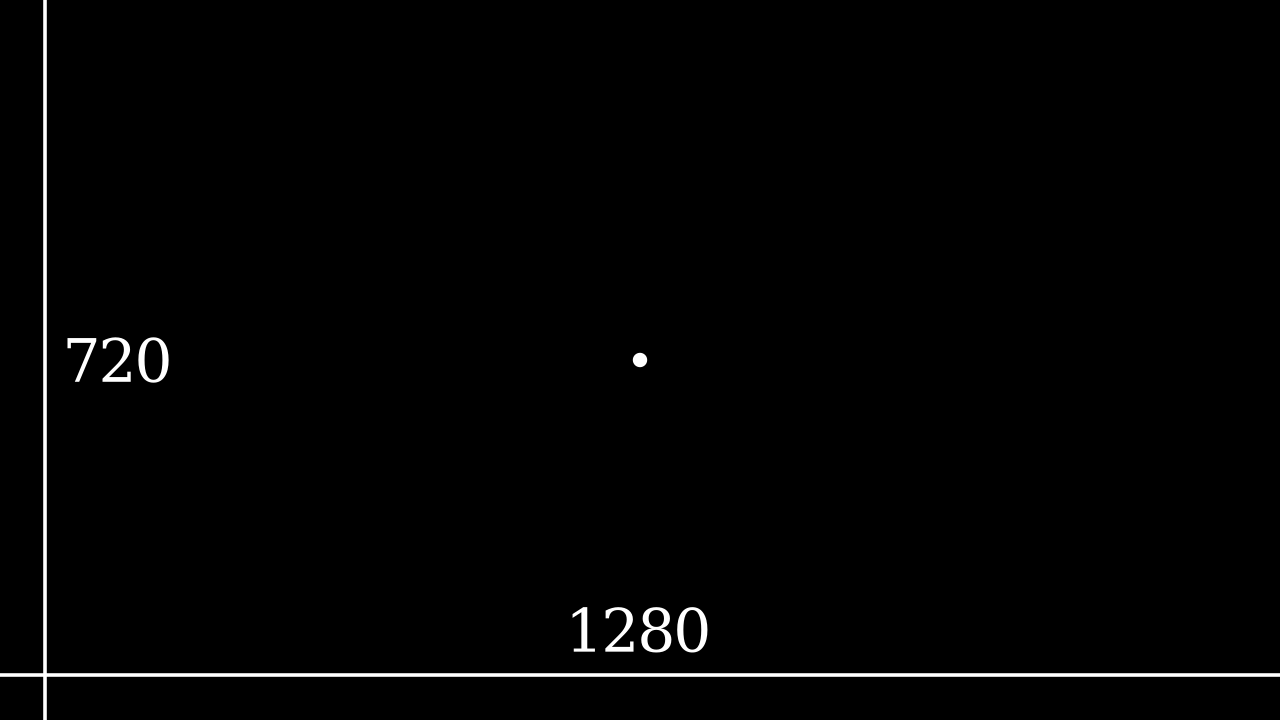

In [9]:
%%manim -qm -v WARNING ShowScreenResolution

class ShowScreenResolution(Scene):
    def construct(self):
        pixel_height = config["pixel_height"]  #  1080 is default
        pixel_width = config["pixel_width"]  # 1920 is default
        frame_width = config["frame_width"]
        frame_height = config["frame_height"]
        self.add(Dot())
        d1 = Line(frame_width * LEFT / 2, frame_width * RIGHT / 2).to_edge(DOWN)
        self.add(d1)
        self.add(Text(str(pixel_width)).next_to(d1, UP))
        d2 = Line(frame_height * UP / 2, frame_height * DOWN / 2).to_edge(LEFT)
        self.add(d2)
        self.add(Text(str(pixel_height)).next_to(d2, RIGHT))

[08/21/23 20:39:03] WARNING  Font Open Sans not in           ]8;id=338716;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=379743;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=641543;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=112541;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=265775;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=806015;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=978542;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=468105;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=413592;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=420760;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=170186;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=292908;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=104390;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=585033;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=877161;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=410098;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=124812;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=582232;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

                    WARNING  Font Open Sans not in           ]8;id=83539;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=238535;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyut

                    WARNING  Font Open Sans not in           ]8;id=236682;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=259389;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#441\441]8;;\
                             ['Abyssinica SIL', 'Ani',                          
                             'AnjaliOldLipi', 'C059',                           
                             'Chandas', 'Chilanka',                             
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyu

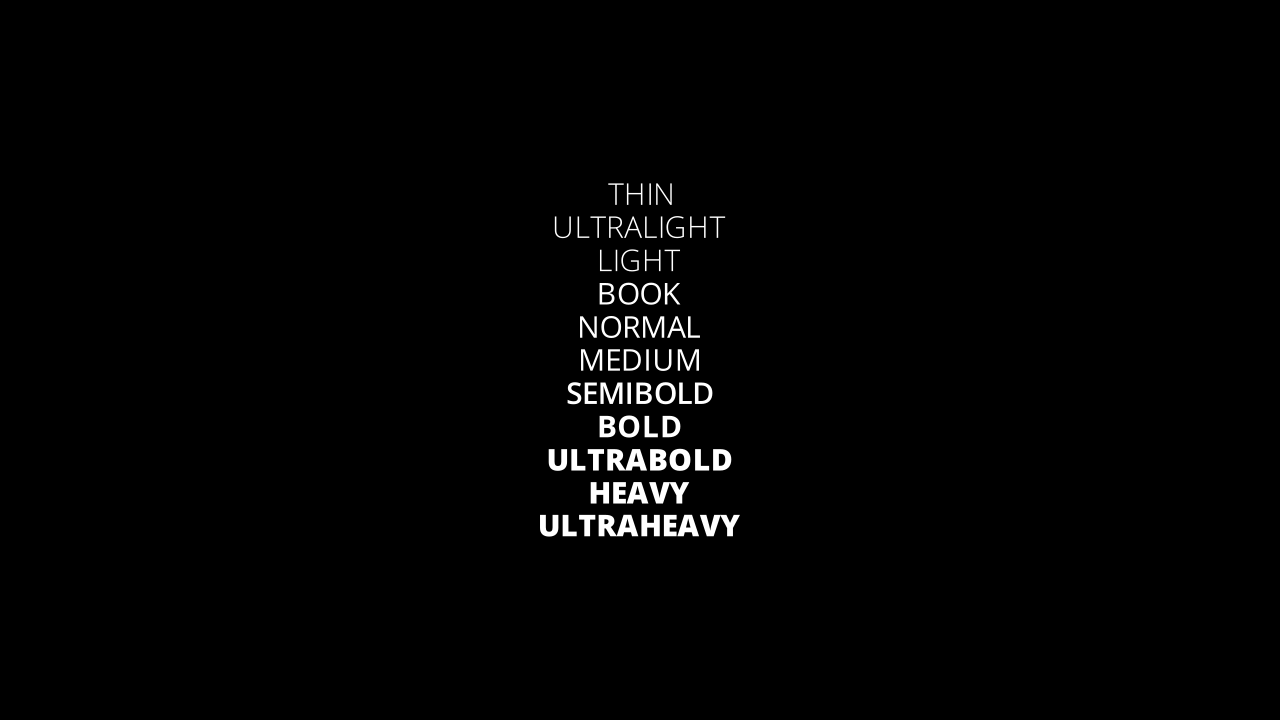

In [10]:
%%manim -qm -v WARNING DifferentWeight

class DifferentWeight(Scene):
    def construct(self):
        import manimpango

        g = VGroup()
        weight_list = dict(sorted({weight: manimpango.Weight(weight).value for weight in manimpango.Weight}.items(), key=lambda x: x[1]))
        for weight in weight_list:
            g += Text(weight.name, weight=weight.name, font="Open Sans")
        self.add(g.arrange(DOWN).scale(0.5))

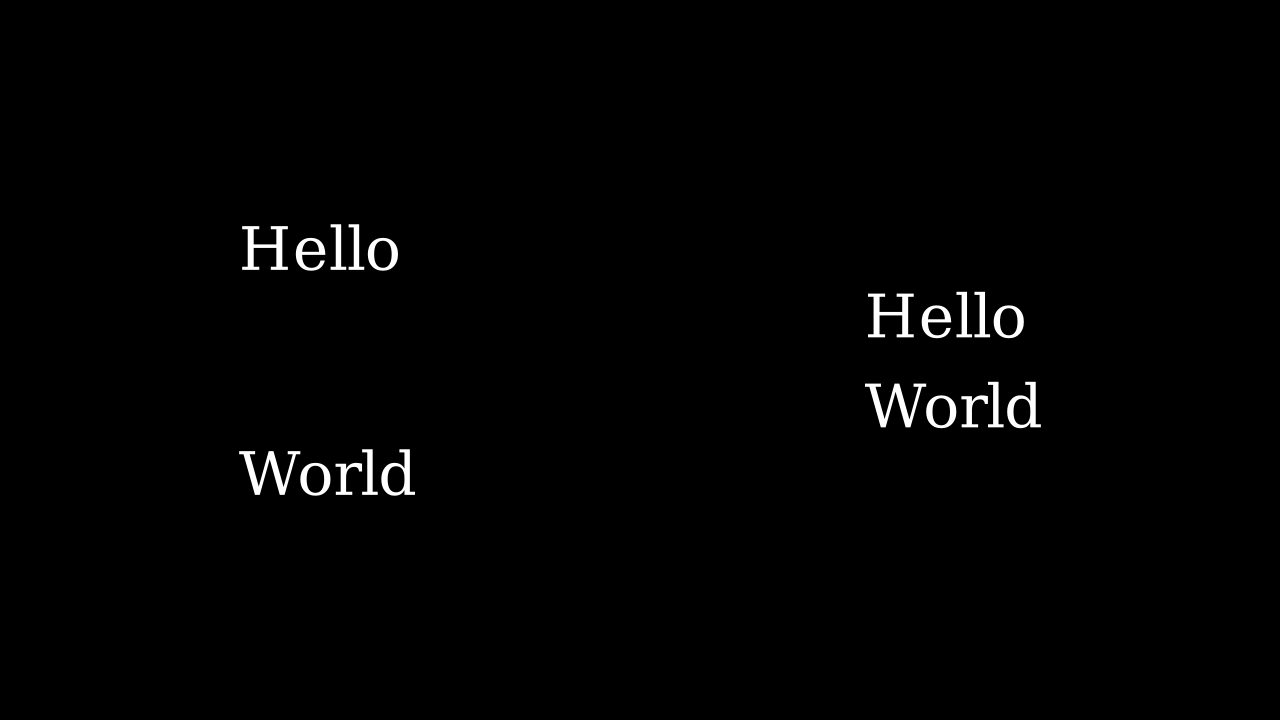

In [11]:
%%manim -qm -v WARNING LineSpacing

class LineSpacing(Scene):
    def construct(self):
        a = Text("Hello\nWorld", line_spacing=1)
        b = Text("Hello\nWorld", line_spacing=4)
        self.add(Group(a,b).arrange(LEFT, buff=5))

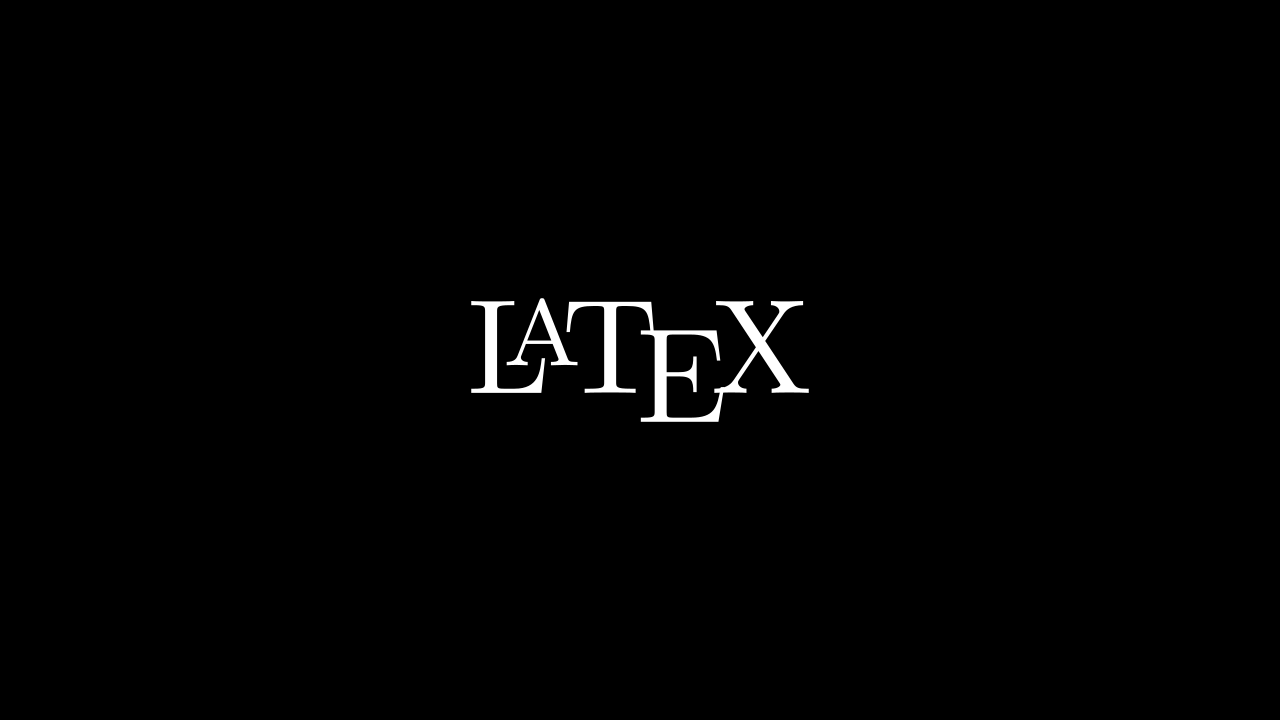

In [12]:
%%manim -qm -v WARNING HelloLaTeX

class HelloLaTeX(Scene):
    def construct(self):
        tex = Tex(r"\LaTeX", font_size=144)
        self.add(tex)

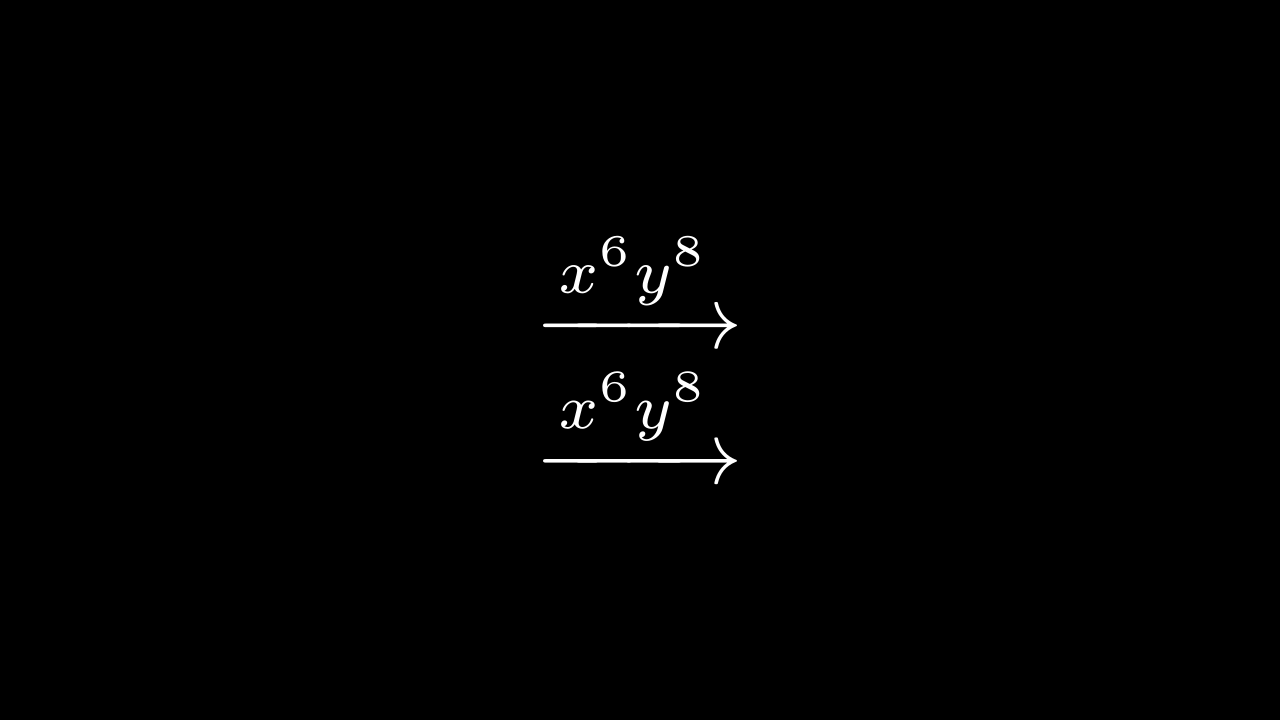

In [13]:
%%manim -qm -v WARNING MathTeXDemo

class MathTeXDemo(Scene):
    def construct(self):
        rtarrow0 = MathTex(r"\xrightarrow{x^6y^8}", font_size=96)
        rtarrow1 = Tex(r"$\xrightarrow{x^6y^8}$", font_size=96)

        self.add(VGroup(rtarrow0, rtarrow1).arrange(DOWN))

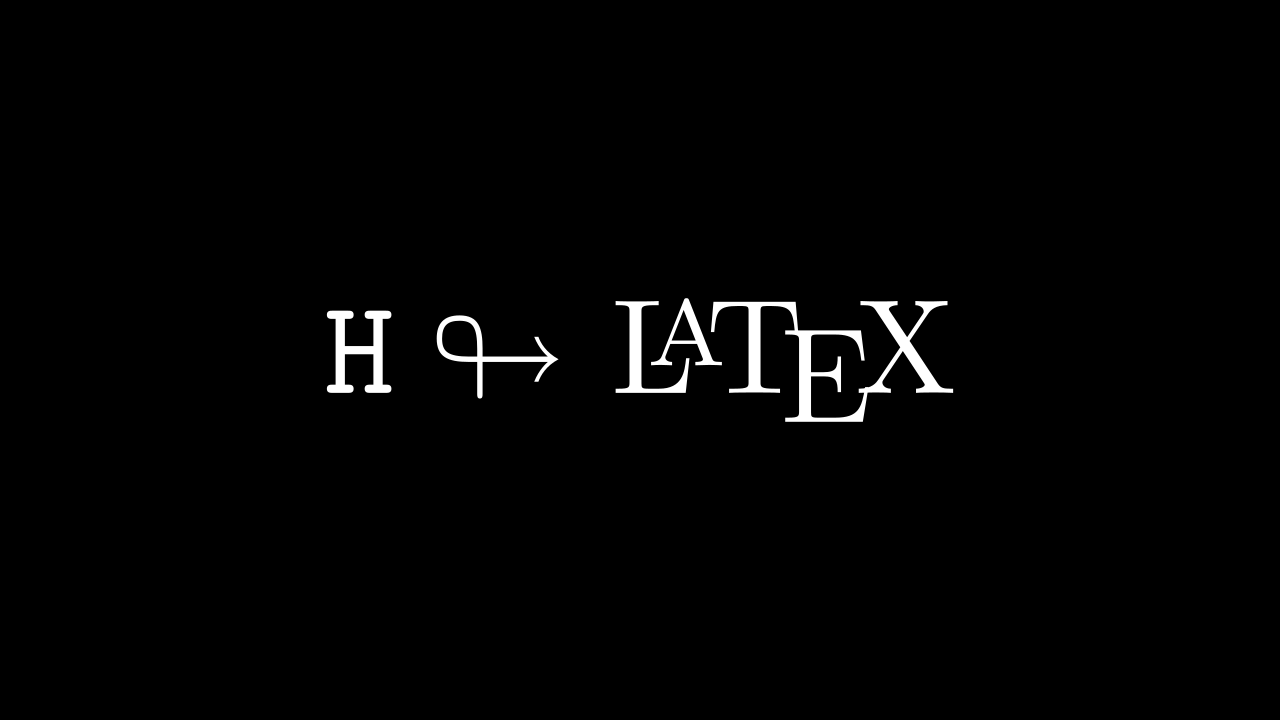

In [14]:
%%manim -qm -v WARNING AMSLaTeX

class AMSLaTeX(Scene):
    def construct(self):
        tex = Tex(r'$\mathtt{H} \looparrowright$ \LaTeX', font_size=144)
        self.add(tex)

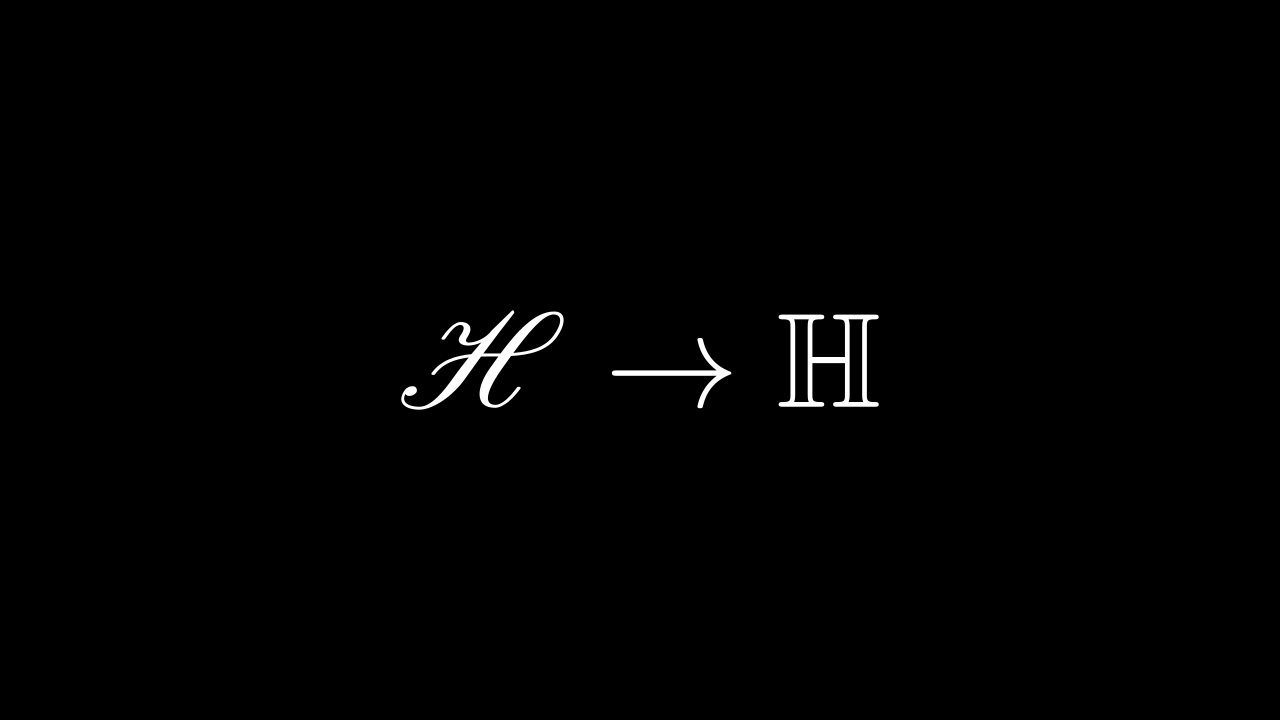

In [15]:
%%manim -qm -v WARNING AddPackageLatex

class AddPackageLatex(Scene):
    def construct(self):
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{mathrsfs}")
        tex = Tex(r'$\mathscr{H} \rightarrow \mathbb{H}$}', tex_template=myTemplate, font_size=144)
        self.add(tex)

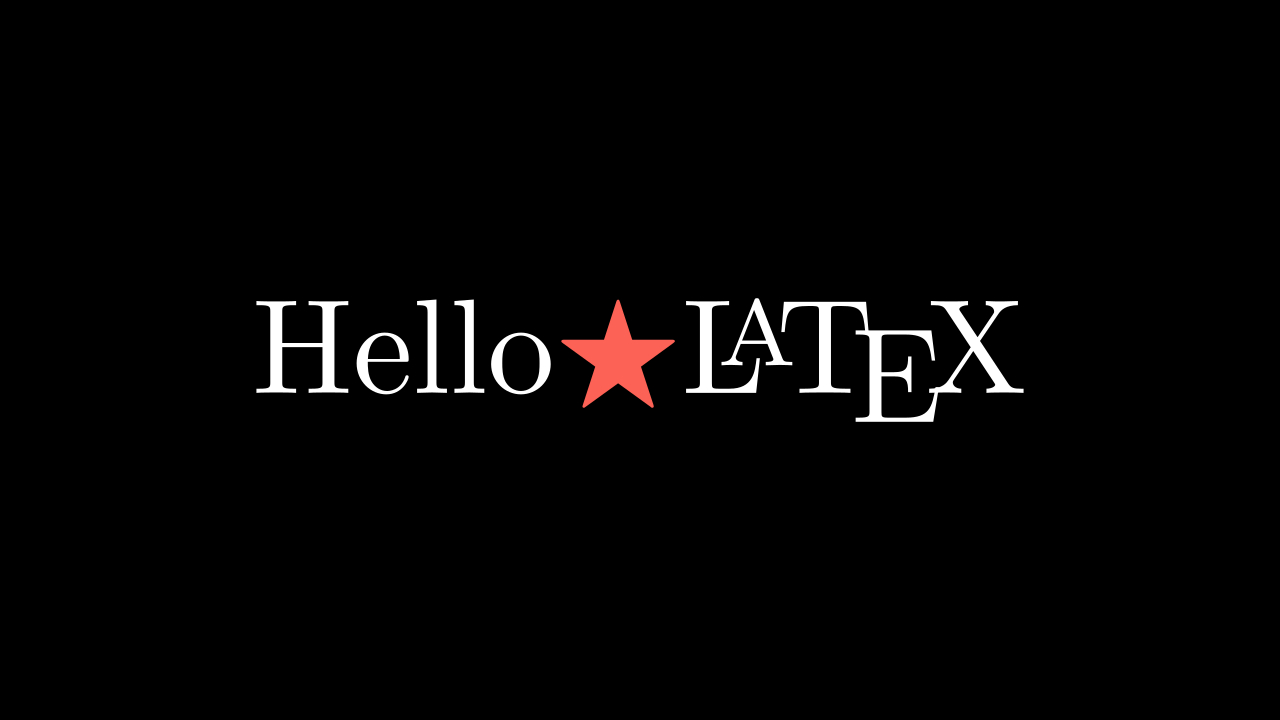

In [16]:
%%manim -qm -v WARNING LaTeXSubstrings

class LaTeXSubstrings(Scene):
    def construct(self):
        tex = Tex('Hello', r'$\bigstar$', r'\LaTeX', font_size=144)
        tex.set_color_by_tex('igsta', RED)
        self.add(tex)

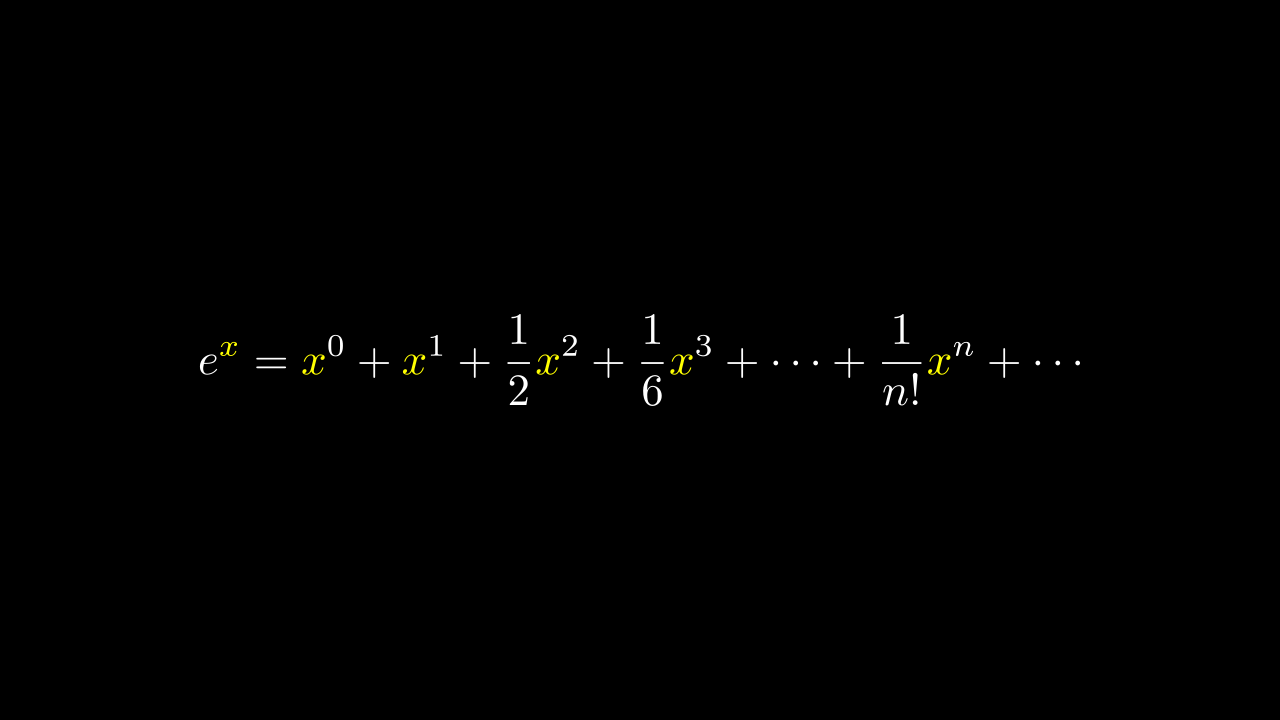

In [17]:
%%manim -qm -v WARNING CorrectLaTeXSubstringColoring

class CorrectLaTeXSubstringColoring(Scene):
    def construct(self):
        equation = MathTex(
            r"e^x = x^0 + x^1 + \frac{1}{2} x^2 + \frac{1}{6} x^3 + \cdots + \frac{1}{n!} x^n + \cdots",
            substrings_to_isolate="x"
        )
        equation.set_color_by_tex("x", YELLOW)
        self.add(equation)

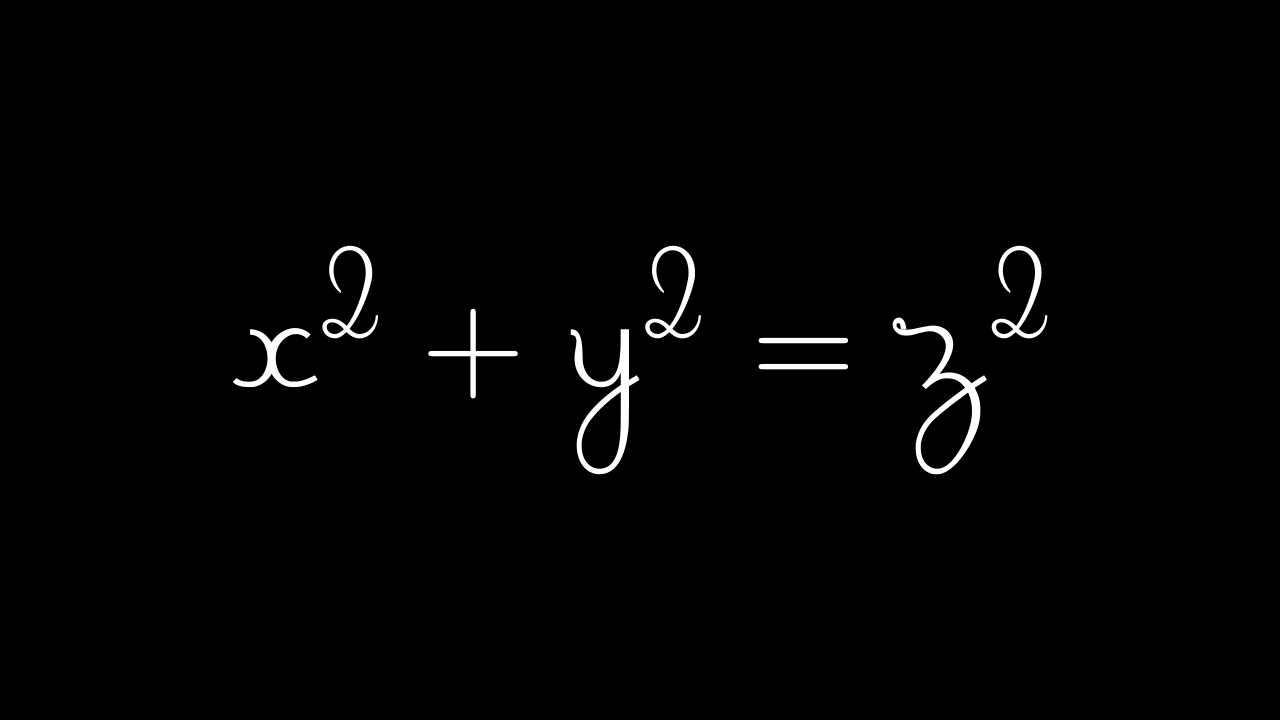

In [18]:
%%manim -qm -v WARNING LaTeXMathFonts

class LaTeXMathFonts(Scene):
    def construct(self):
        tex = Tex(r'$x^2 + y^2 = z^2$', tex_template=TexFontTemplates.french_cursive, font_size=144)
        self.add(tex)

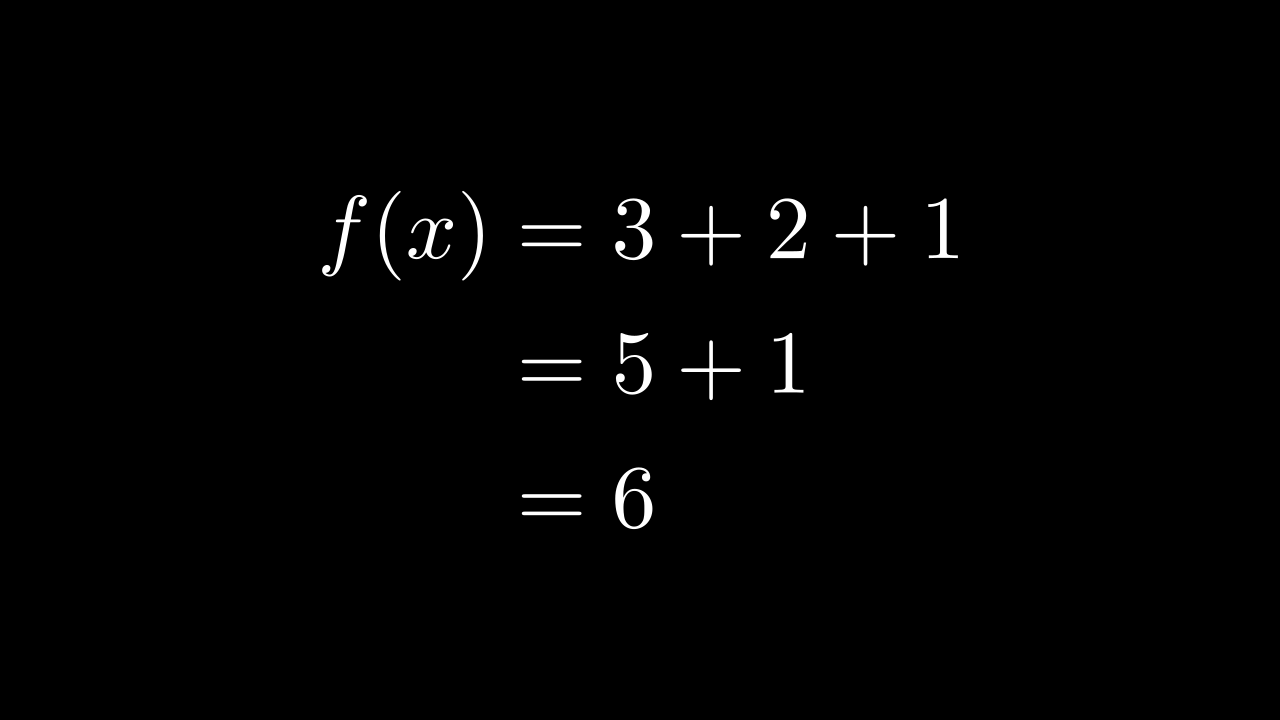

In [19]:
%%manim -qm -v WARNING LaTeXAlignEnvironment

class LaTeXAlignEnvironment(Scene):
    def construct(self):
        tex = MathTex(r'f(x) &= 3 + 2 + 1\\ &= 5 + 1 \\ &= 6', font_size=96)
        self.add(tex)

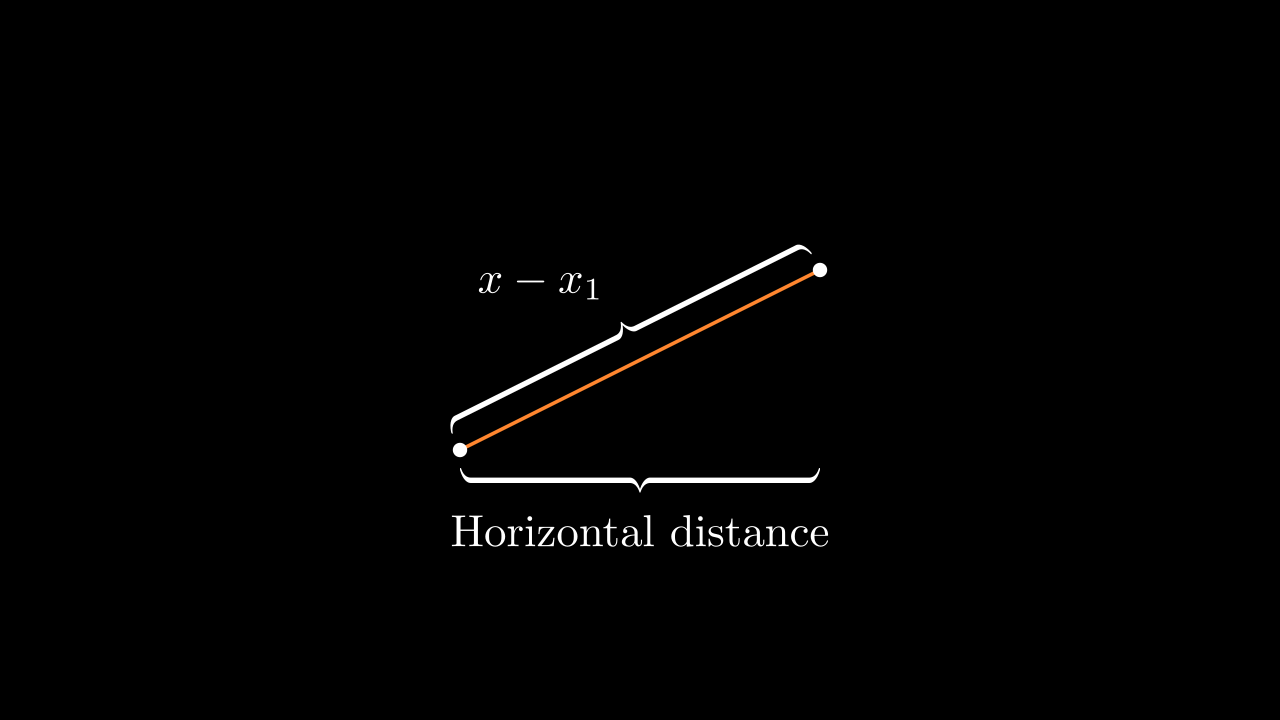

In [20]:
%%manim -qm -v WARNING BraceAnnotation

class BraceAnnotation(Scene):
    def construct(self):
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])
        line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)
        b1 = Brace(line)
        b1text = b1.get_text("Horizontal distance")
        b2 = Brace(line, direction=line.copy().rotate(PI / 2).get_unit_vector())
        b2text = b2.get_tex("x-x_1")
        self.add(line, dot, dot2, b1, b2, b1text, b2text)

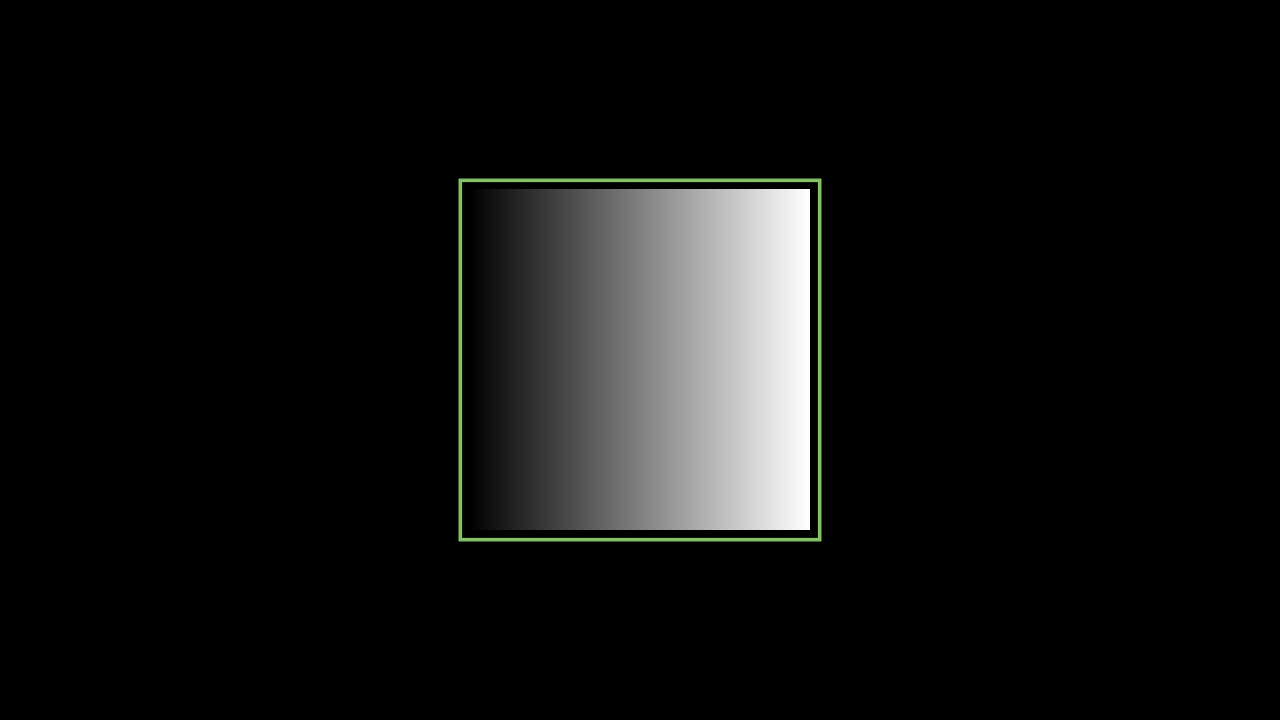

In [21]:
%%manim -qm -v WARNING GradientImageFromArray

class GradientImageFromArray(Scene):
    def construct(self):
        n = 256
        imageArray = np.uint8(
            [[i * 256 / n for i in range(0, n)] for _ in range(0, n)]
        )
        image = ImageMobject(imageArray).scale(2)
        image.background_rectangle = SurroundingRectangle(image, GREEN)
        self.add(image, image.background_rectangle)

In [22]:
%%manim -qm -v WARNING BooleanOperations

config.media_width = "95%"

class BooleanOperations(Scene):
    def construct(self):
        ellipse1 = Ellipse(
            width=4.0, height=5.0, fill_opacity=0.5, color=BLUE, stroke_width=10
        ).move_to(LEFT)
        ellipse2 = ellipse1.copy().set_color(color=RED).move_to(RIGHT)
        bool_ops_text = MarkupText("<u>Boolean Operation</u>").next_to(ellipse1, UP * 3)
        ellipse_group = Group(bool_ops_text, ellipse1, ellipse2).move_to(LEFT * 3)
        self.play(FadeIn(ellipse_group))

        i = Intersection(ellipse1, ellipse2, color=GREEN, fill_opacity=0.5)
        self.play(i.animate.scale(0.25).move_to(RIGHT * 5 + UP * 2.5))
        intersection_text = Text("Intersection", font_size=23).next_to(i, UP)
        self.play(FadeIn(intersection_text))

        u = Union(ellipse1, ellipse2, color=ORANGE, fill_opacity=0.5)
        union_text = Text("Union", font_size=23)
        self.play(u.animate.scale(0.3).next_to(i, DOWN, buff=union_text.height * 3))
        union_text.next_to(u, UP)
        self.play(FadeIn(union_text))

        e = Exclusion(ellipse1, ellipse2, color=YELLOW, fill_opacity=0.5)
        exclusion_text = Text("Exclusion", font_size=23)
        self.play(e.animate.scale(0.3).next_to(u, DOWN, buff=exclusion_text.height * 3.5))
        exclusion_text.next_to(e, UP)
        self.play(FadeIn(exclusion_text))

        d = Difference(ellipse1, ellipse2, color=PINK, fill_opacity=0.5)
        difference_text = Text("Difference", font_size=23)
        self.play(d.animate.scale(0.3).next_to(u, LEFT, buff=difference_text.height * 3.5))
        difference_text.next_to(d, UP)
        self.play(FadeIn(difference_text))
        self.wait()

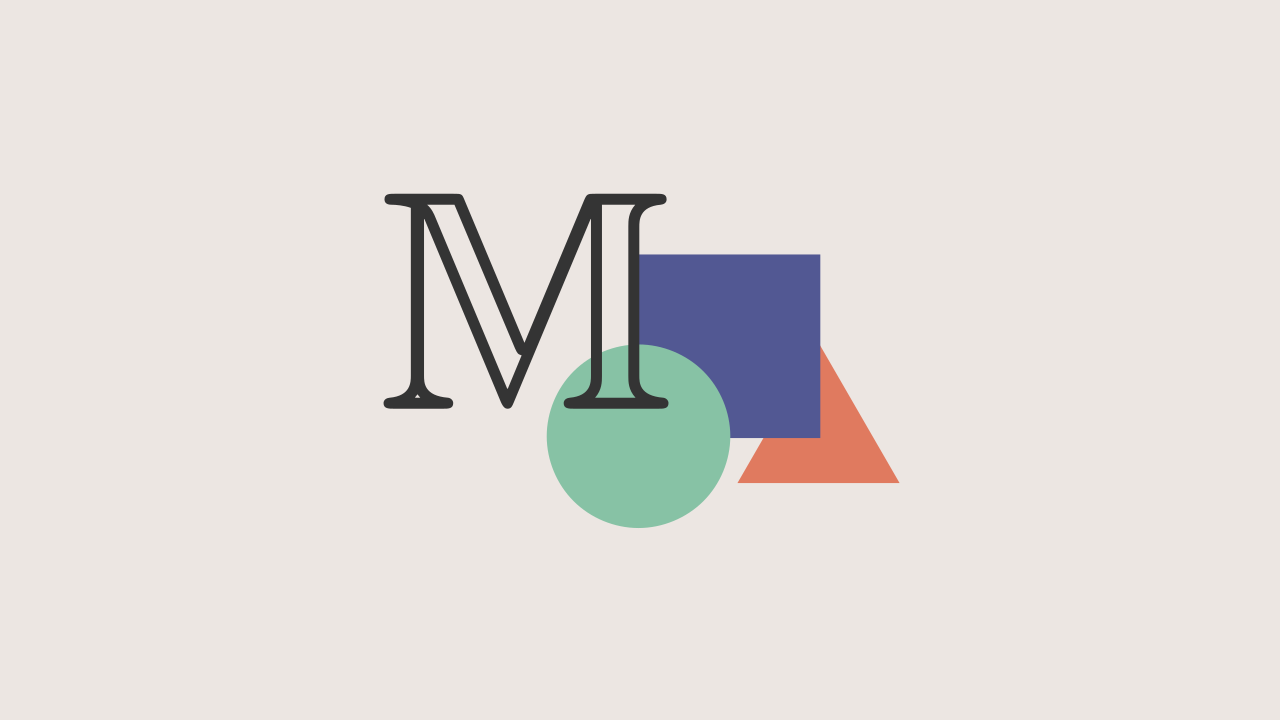

In [23]:
%%manim -qm -v WARNING ManimCELogo

class ManimCELogo(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        logo_black = "#343434"
        ds_m = MathTex(r"\mathbb{M}", fill_color=logo_black).scale(7)
        ds_m.shift(2.25 * LEFT + 1.5 * UP)
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        logo = VGroup(triangle, square, circle, ds_m)  # order matters
        logo.move_to(ORIGIN)
        self.add(logo)

In [24]:
%%manim -qm -v WARNING OpeningManim


class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift = UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(- 10, 10, 1), y_range=(- 6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)  # Make sure title is on top of grid
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p
                + np.array(
                    [
                        np.sin(p[1]),
                        np.sin(p[0]),
                        0,
                    ]
                )
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

In [25]:
# Make animated gif:
#!ffmpeg -i ./media/videos/sagemath-examples/720p30/OpeningManim.mp4 -y ./media/videos/sagemath-examples/720p30/OpeningManimTest.gif 

<img src="./media/videos/sagemath-examples/720p30/OpeningManim.gif" width="900" align="center">

Testing if the `ffmpeg`animated gif production works:
#<img src="./media/videos/sagemath-examples/720p30/OpeningManimTest.gif" width="900" align="center">

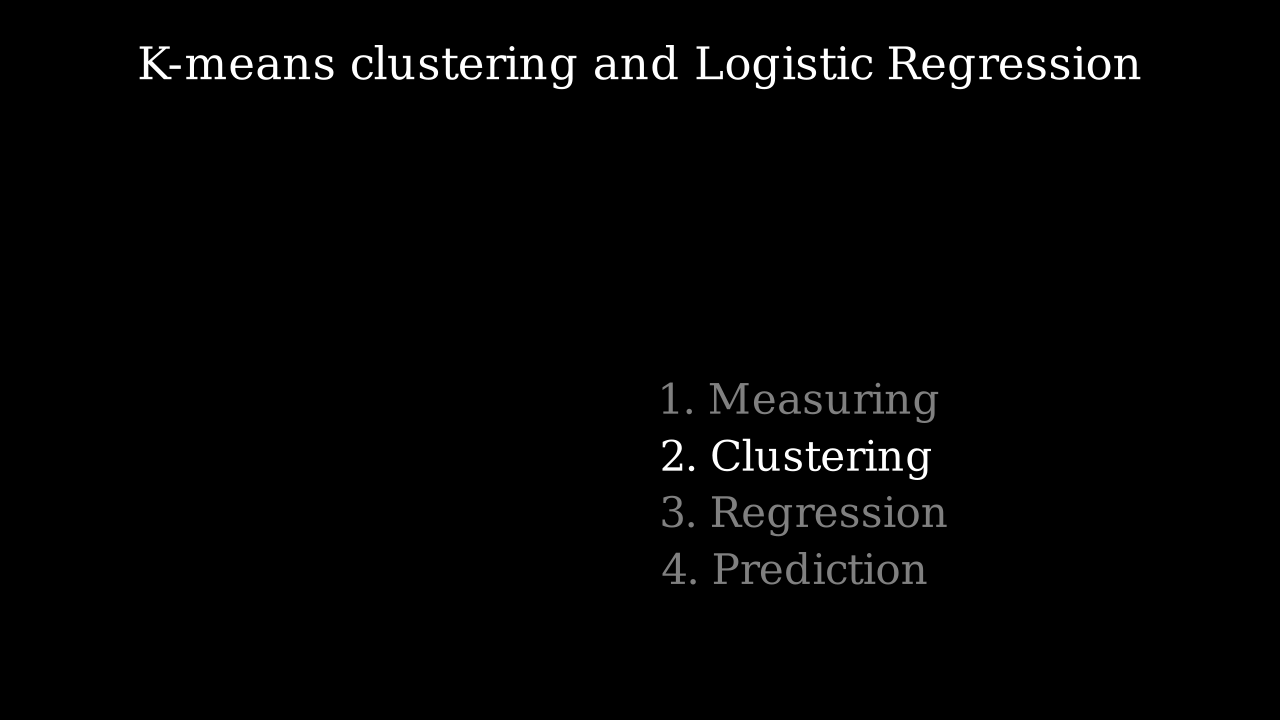

In [27]:
%%manim -qm -v WARNING TextAlignment


class TextAlignment(Scene):
    def construct(self):
        title = Text("K-means clustering and Logistic Regression", color=WHITE)
        title.scale(0.75)
        self.add(title.to_edge(UP))

        t1 = Text("1. Measuring").set_color(WHITE)

        t2 = Text("2. Clustering").set_color(WHITE)

        t3 = Text("3. Regression").set_color(WHITE)

        t4 = Text("4. Prediction").set_color(WHITE)

        x = VGroup(t1, t2, t3, t4).arrange(direction=DOWN, aligned_edge=LEFT).scale(0.7).next_to(ORIGIN,DR)
        x.set_opacity(0.5)
        x.submobjects[1].set_opacity(1)
        self.add(x)


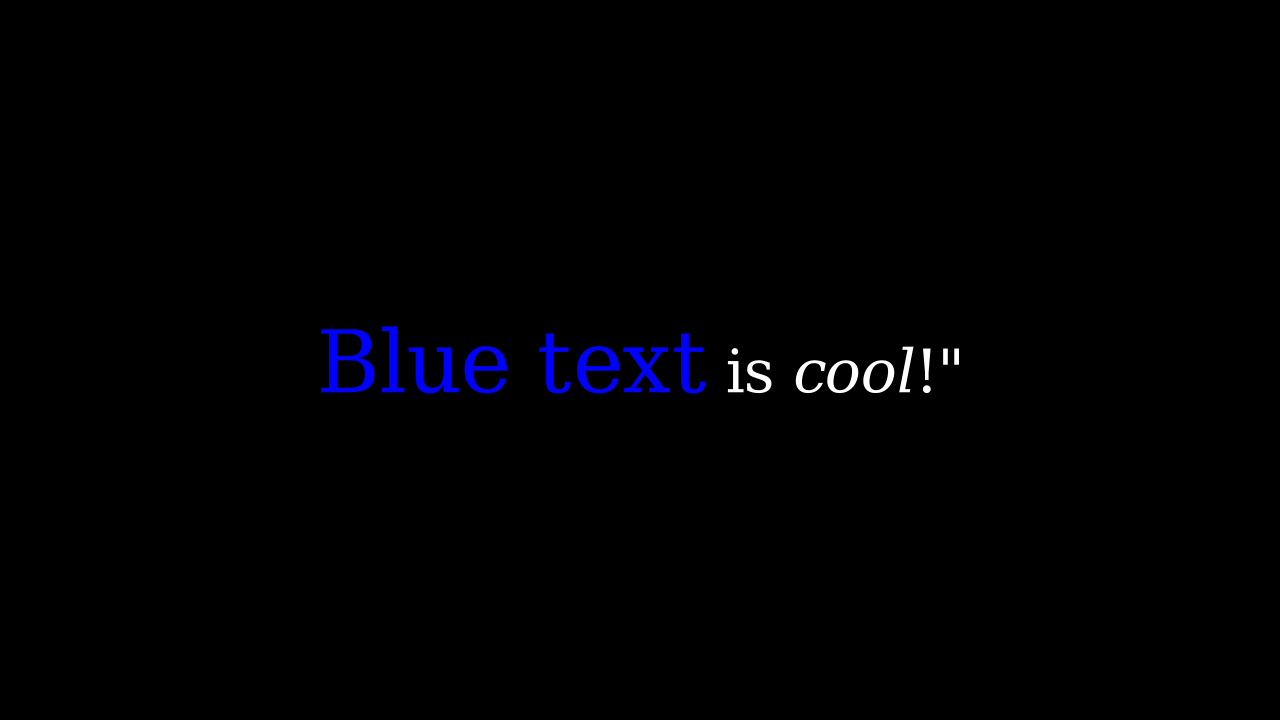

In [28]:
%%manim -qm -v WARNING  MarkupExample

class MarkupExample(Scene):
    def construct(self):
        text = MarkupText('<span foreground="blue" size="x-large">Blue text</span> is <i>cool</i>!"')
        self.add(text)

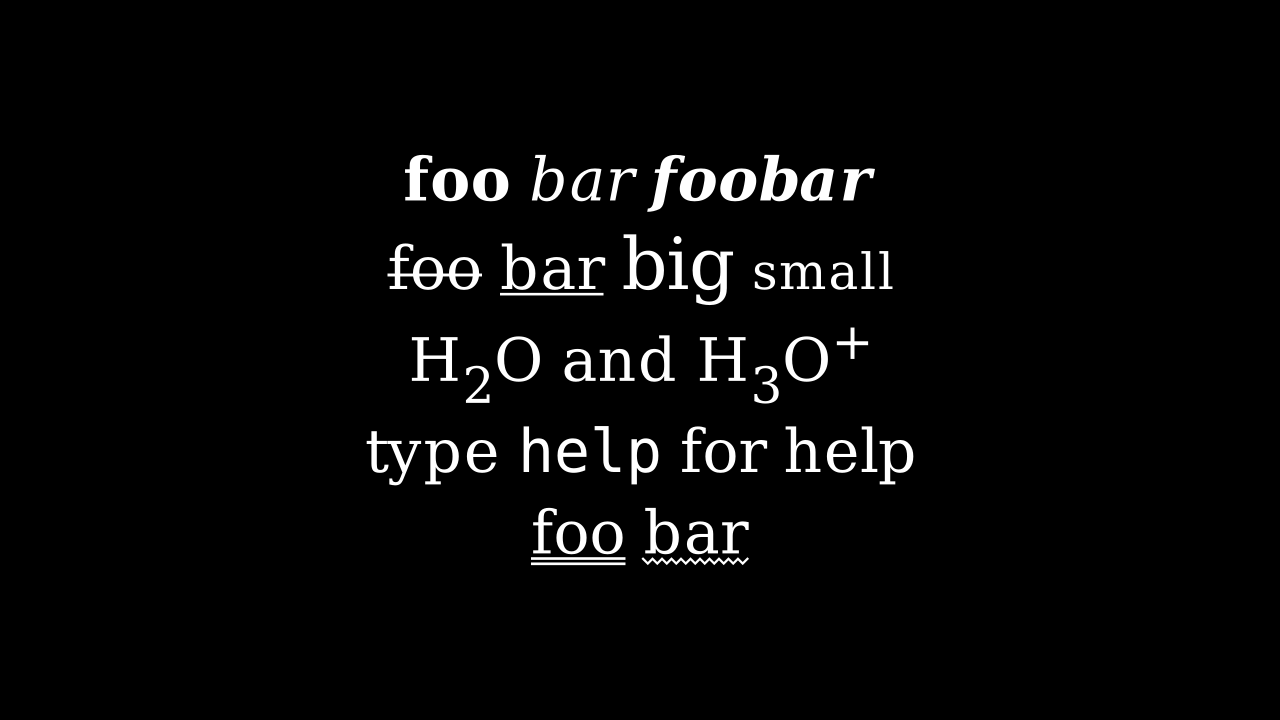

In [29]:
%%manim -qm -v WARNING BasicMarkupExample

class BasicMarkupExample(Scene):
    def construct(self):
        text1 = MarkupText("<b>foo</b> <i>bar</i> <b><i>foobar</i></b>")
        text2 = MarkupText("<s>foo</s> <u>bar</u> <big>big</big> <small>small</small>")
        text3 = MarkupText("H<sub>2</sub>O and H<sub>3</sub>O<sup>+</sup>")
        text4 = MarkupText("type <tt>help</tt> for help")
        text5 = MarkupText(
            '<span underline="double">foo</span> <span underline="error">bar</span>'
        )
        group = VGroup(text1, text2, text3, text4, text5).arrange(DOWN)
        self.add(group)

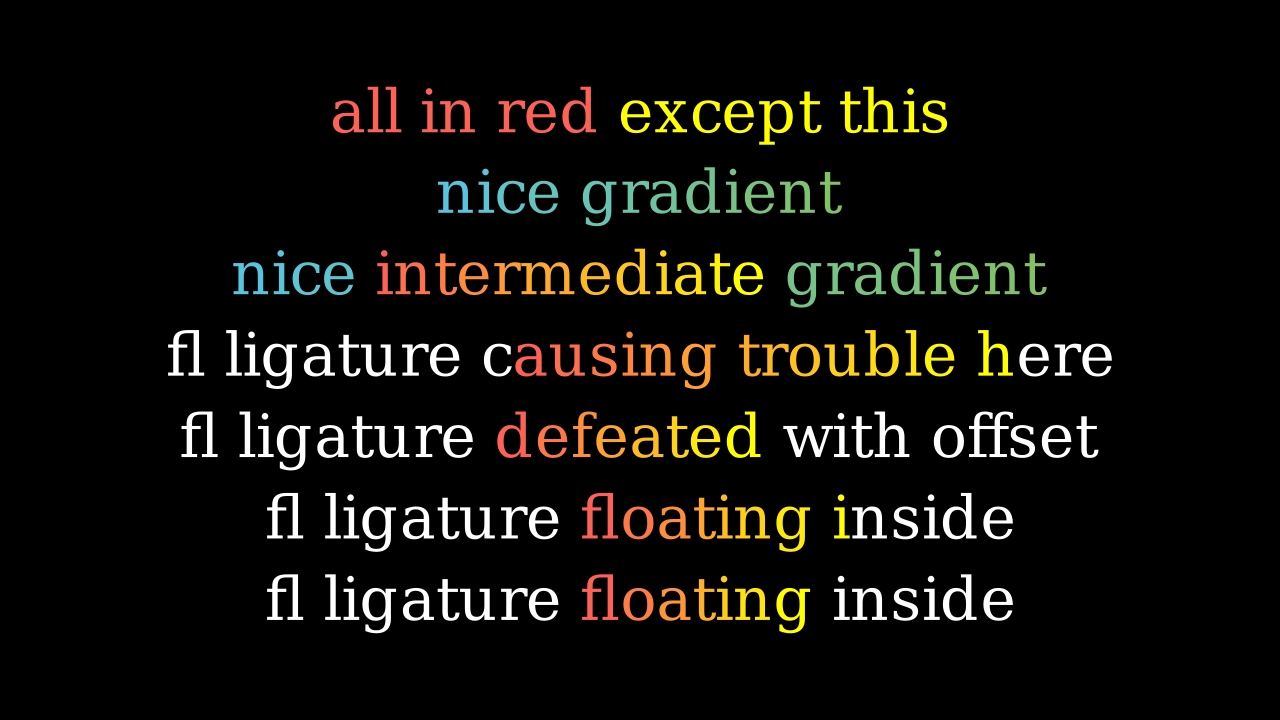

In [30]:
%%manim -qm -v WARNING ColorExample

class ColorExample(Scene):
    def construct(self):
        text1 = MarkupText(
            f'all in red <span fgcolor="{YELLOW}">except this</span>', color=RED
        )
        text2 = MarkupText("nice gradient", gradient=(BLUE, GREEN))
        text3 = MarkupText(
            'nice <gradient from="RED" to="YELLOW">intermediate</gradient> gradient',
            gradient=(BLUE, GREEN),
        )
        text4 = MarkupText(
            'fl ligature <gradient from="RED" to="YELLOW">causing trouble</gradient> here'
        )
        text5 = MarkupText(
            'fl ligature <gradient from="RED" to="YELLOW" offset="1">defeated</gradient> with offset'
        )
        text6 = MarkupText(
            'fl ligature <gradient from="RED" to="YELLOW" offset="1">floating</gradient> inside'
        )
        text7 = MarkupText(
            'fl ligature <gradient from="RED" to="YELLOW" offset="1,1">floating</gradient> inside'
        )
        group = VGroup(text1, text2, text3, text4, text5, text6, text7).arrange(DOWN)
        self.add(group)

[08/21/23 20:39:36] WARNING  Font sans not in ['Abyssinica  ]8;id=29607;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py\text_mobject.py]8;;\:]8;id=7489;file:///home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/text/text_mobject.py#1160\1160]8;;\
                             SIL', 'Ani', 'AnjaliOldLipi',                      
                             'C059', 'Chandas', 'Chilanka',                     
                             'D050000L', 'DejaVu Math TeX                       
                             Gyre', 'DejaVu Sans', 'DejaVu                      
                             Sans Mono', 'DejaVu Serif',                        
                             'Dhurjati', 'Droid Sans                            
                             Fallback', 'Dyuthi',                               
                             'FreeMono', 'Free

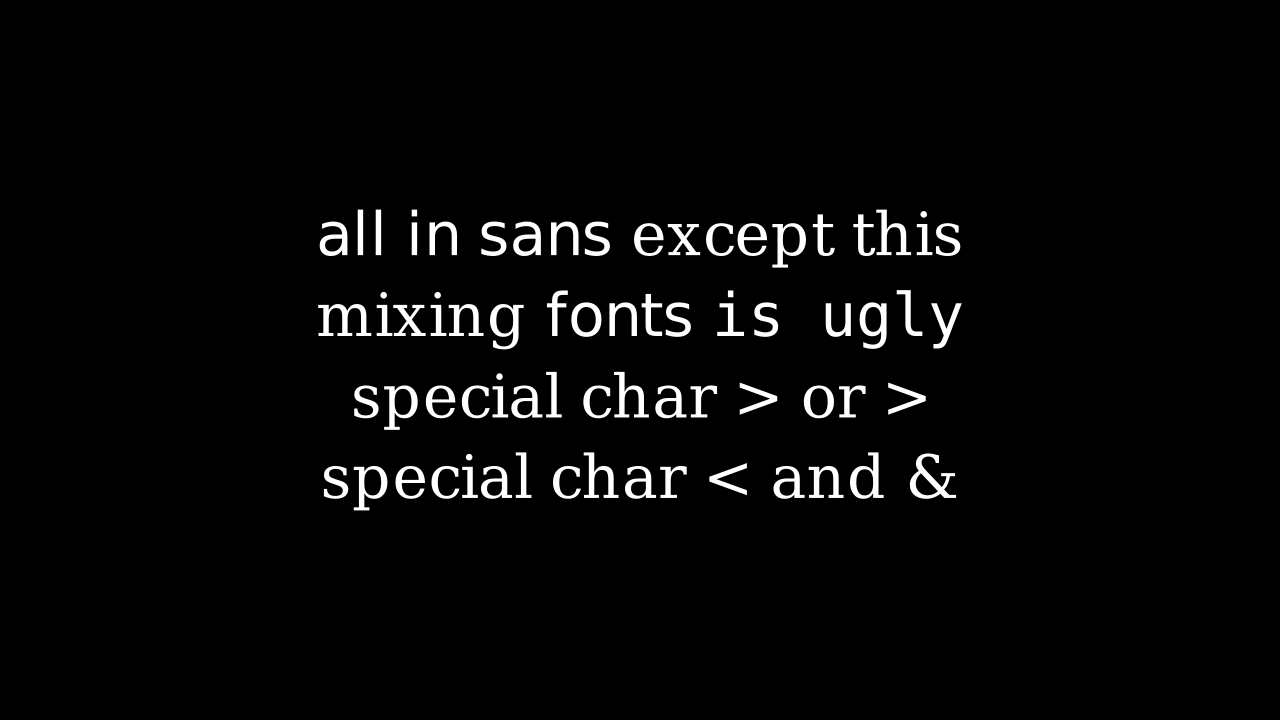

In [31]:
%%manim -qm -v WARNING FontExample

class FontExample(Scene):
    def construct(self):
        text1 = MarkupText(
            'all in sans <span font_family="serif">except this</span>', font="sans"
        )
        text2 = MarkupText(
            '<span font_family="serif">mixing</span> <span font_family="sans">fonts</span> <span font_family="monospace">is ugly</span>'
        )
        text3 = MarkupText("special char > or &gt;")
        text4 = MarkupText("special char &lt; and &amp;")
        group = VGroup(text1, text2, text3, text4).arrange(DOWN)
        self.add(group)

In [32]:
%%manim -qh -v WARNING JustifyText

config.media_width = "95%"

class JustifyText(Scene):
    def construct(self):
        ipsum_text = (
            "Lorem ipsum dolor sit amet, consectetur adipiscing elit."
            "Praesent feugiat metus sit amet iaculis pulvinar. Nulla posuere "
            "quam a ex aliquam, eleifend consectetur tellus viverra. Aliquam "
            "fermentum interdum justo, nec rutrum elit pretium ac. Nam quis "
            "leo pulvinar, dignissim est at, venenatis nisi. Quisque mattis "
            "dolor ut euismod hendrerit. Nullam eu ante sollicitudin, commodo "
            "risus a, vehicula odio. Nam urna tortor, aliquam a nibh eu, commodo "
            "imperdiet arcu. Donec tincidunt commodo enim a tincidunt."
        )
        justified_text = MarkupText(ipsum_text, justify=True).scale(0.4)
        not_justified_text = MarkupText(ipsum_text, justify=False).scale(0.4)
        just_title = Title("Justified")
        njust_title = Title("Not Justified")
        self.add(njust_title, not_justified_text)
        self.play(
            Transform(
                not_justified_text,
                justified_text,
            ),
            Transform(
                njust_title,
                just_title,
            ),
            run_time=2,
        )
        self.wait(1)

<string>:16: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


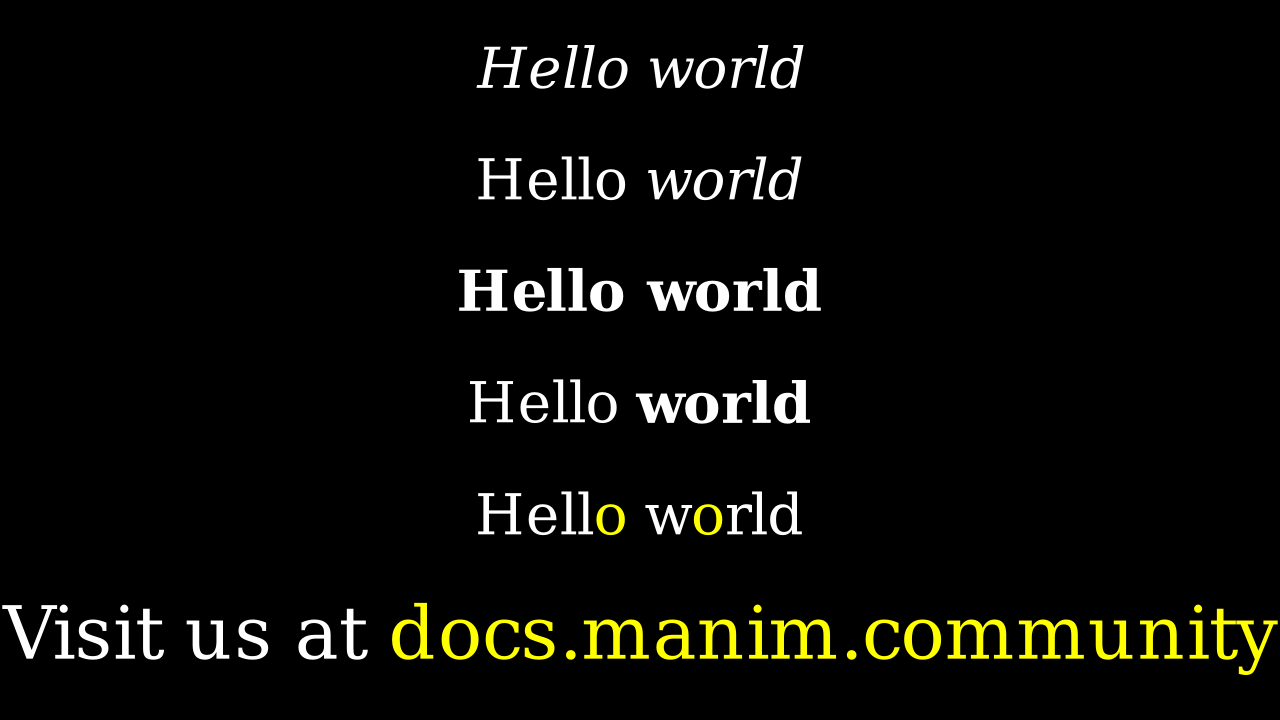

In [33]:
%%manim -qm -v WARNING TextItalicAndBoldExample

class TextItalicAndBoldExample(Scene):
    def construct(self):
        text1 = Text("Hello world", slant=ITALIC)
        text2 = Text("Hello world", t2s={'world':ITALIC})
        text3 = Text("Hello world", weight=BOLD)
        text4 = Text("Hello world", t2w={'world':BOLD})
        text5 = Text("Hello world", t2c={'o':YELLOW}, disable_ligatures=True)
        text6 = Text(
            "Visit us at docs.manim.community",
            t2c={"docs.manim.community": YELLOW},
            disable_ligatures=True,
       )
        text6.scale(1.3).shift(DOWN)
        self.add(text1, text2, text3, text4, text5 , text6)
        Group(*self.mobjects).arrange(DOWN, buff=.8).set_height(config.frame_height-LARGE_BUFF)

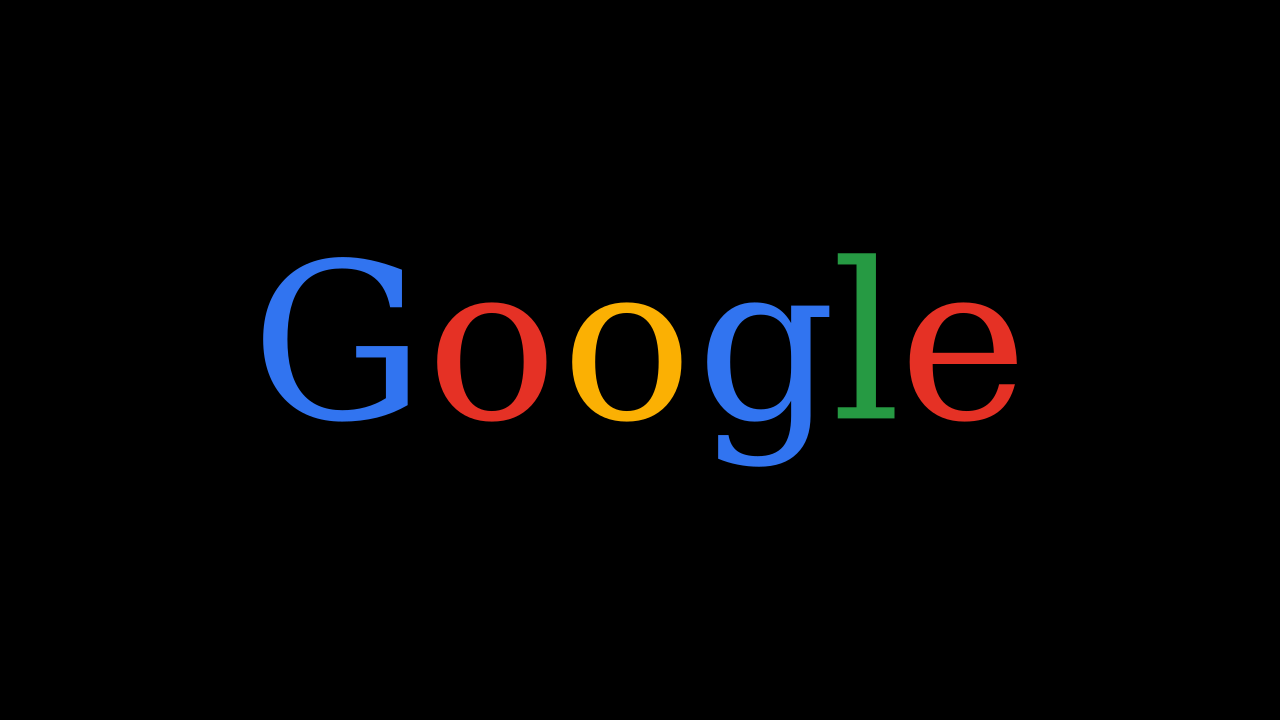

In [34]:
%%manim -qm -v WARNING TextMoreCustomization

class TextMoreCustomization(Scene):
    def construct(self):
        text1 = Text(
            'Google',
            t2c={'[:1]': '#3174f0', '[1:2]': '#e53125',
                 '[2:3]': '#fbb003', '[3:4]': '#3174f0',
                 '[4:5]': '#269a43', '[5:]': '#e53125'}, font_size=58).scale(3)
        self.add(text1)

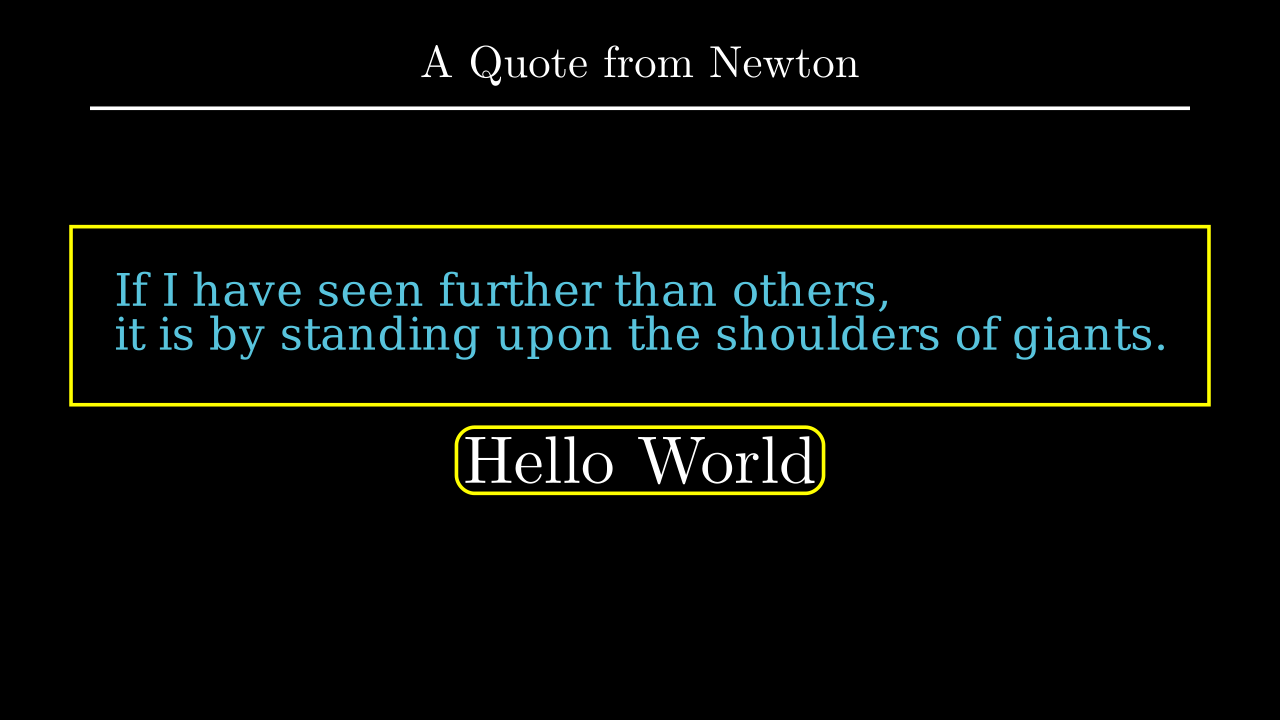

In [35]:
%%manim -qm -v WARNING SurroundingRectExample

class SurroundingRectExample(Scene):
    def construct(self):
        title = Title("A Quote from Newton")
        quote = Text(
            "If I have seen further than others, \n"
            "it is by standing upon the shoulders of giants.",
            color=BLUE,
        ).scale(0.75)
        box = SurroundingRectangle(quote, color=YELLOW, buff=MED_LARGE_BUFF)

        t2 = Tex(r"Hello World").scale(1.5)
        box2 = SurroundingRectangle(t2, corner_radius=0.2)
        mobjects = VGroup(VGroup(box, quote), VGroup(t2, box2)).arrange(DOWN)
        self.add(title, mobjects)

/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/svg/svg_mobject.py:444: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_height(self.svg_height)
/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/svg/svg_mobject.py:446: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_width(self.svg_width)


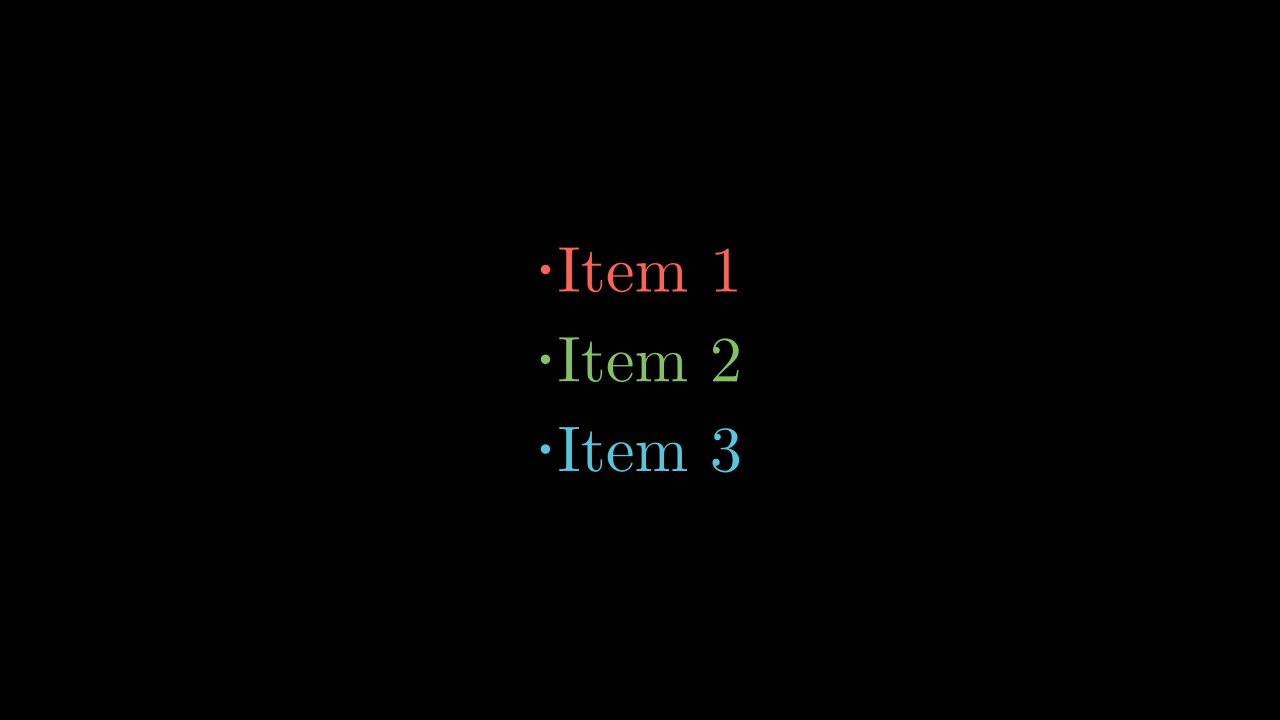

In [36]:
%%manim -qm -v WARNING BulletedListExample

class BulletedListExample(Scene):
    def construct(self):
        blist = BulletedList("Item 1", "Item 2", "Item 3", height=2, width=2)
        blist.set_color_by_tex("Item 1", RED)
        blist.set_color_by_tex("Item 2", GREEN)
        blist.set_color_by_tex("Item 3", BLUE)
        self.add(blist)

In [37]:
%%manim -qm -v WARNING ChangingCameraWidthAndRestore

class ChangingCameraWidthAndRestore(MovingCameraScene):
    def construct(self):
        text = Text("Hello World").set_color(BLUE)
        self.add(text)
        self.camera.frame.save_state()
        self.play(self.camera.frame.animate.set(width=text.width * 1.2))
        self.wait(0.3)
        self.play(Restore(self.camera.frame))

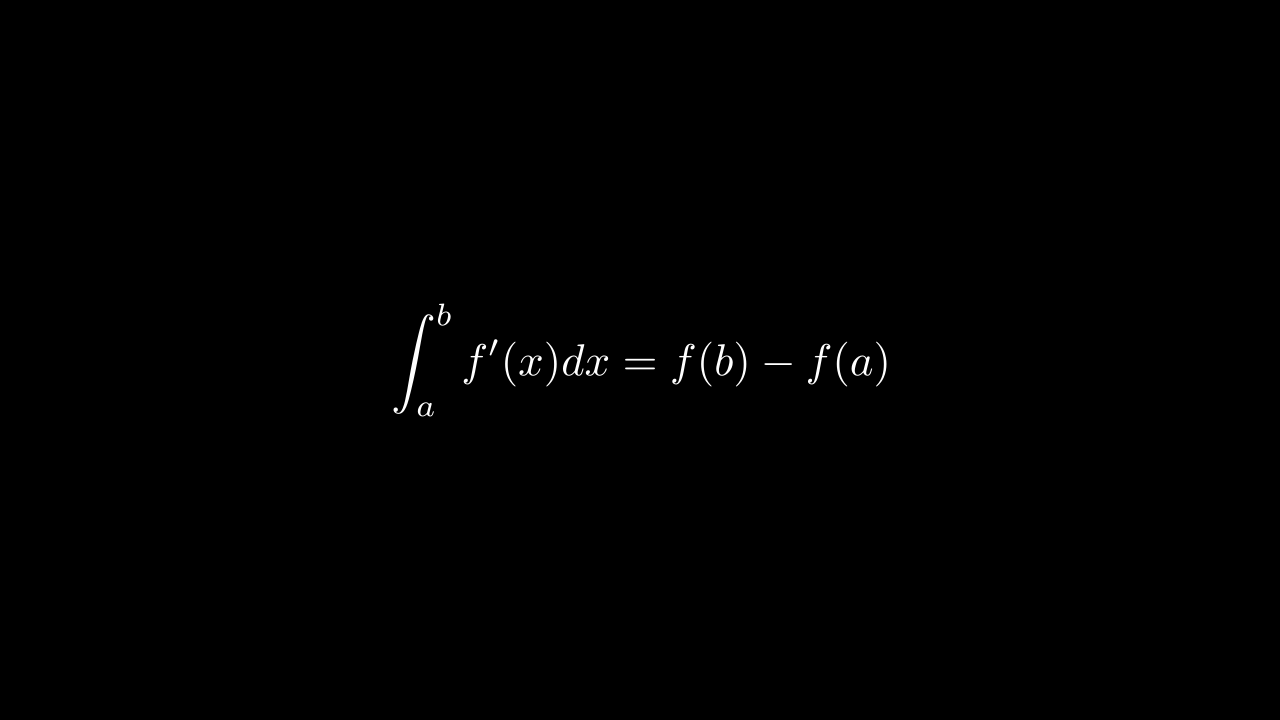

In [38]:
%%manim -qm -v WARNING Formula

class Formula(Scene):
    def construct(self):
        t = MathTex(r"\int_a^b f'(x) dx = f(b)- f(a)")
        self.add(t)

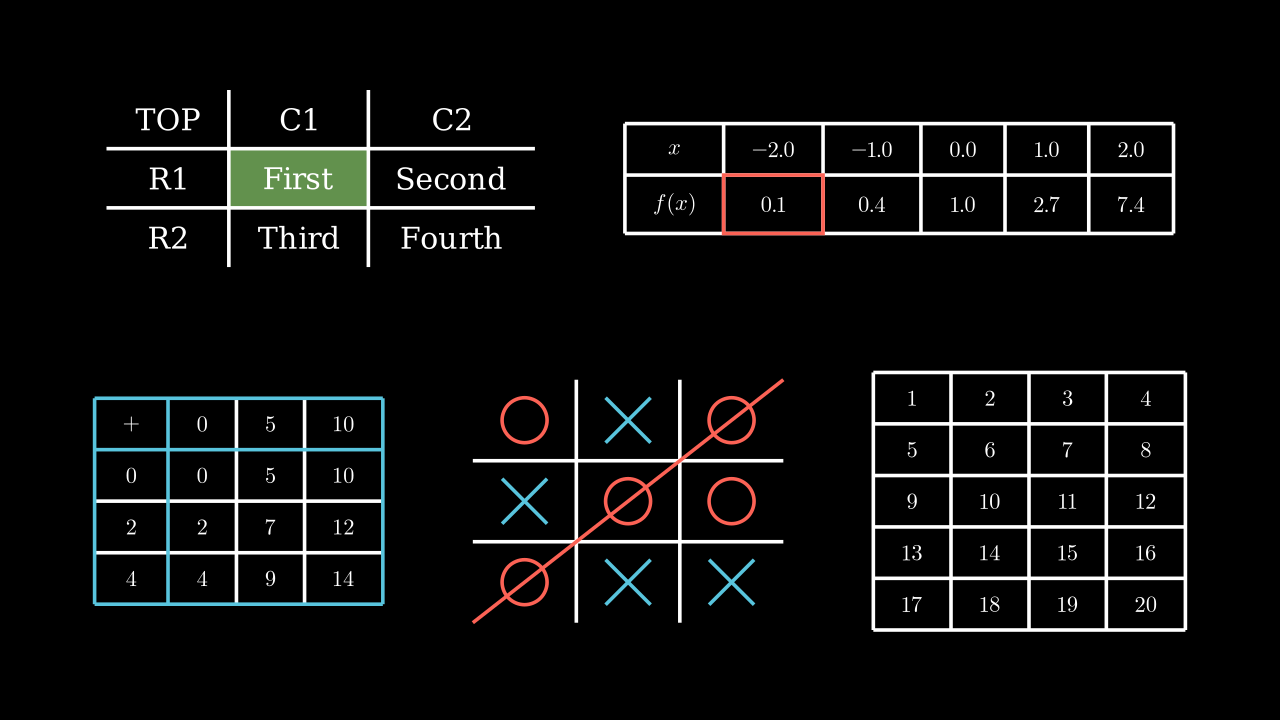

In [39]:
%%manim -qm -v WARNING TableExamples

class TableExamples(Scene):
    def construct(self):
        t0 = Table(
            [["First", "Second"],
            ["Third","Fourth"]],
            row_labels=[Text("R1"), Text("R2")],
            col_labels=[Text("C1"), Text("C2")],
            top_left_entry=Text("TOP"))
        t0.add_highlighted_cell((2,2), color=GREEN)
        x_vals = np.linspace(-2,2,5)
        y_vals = np.exp(x_vals)
        t1 = DecimalTable(
            [x_vals, y_vals],
            row_labels=[MathTex("x"), MathTex("f(x)")],
            include_outer_lines=True)
        t1.add(t1.get_cell((2,2), color=RED))
        t2 = MathTable(
            [["+", 0, 5, 10],
            [0, 0, 5, 10],
            [2, 2, 7, 12],
            [4, 4, 9, 14]],
            include_outer_lines=True)
        t2.get_horizontal_lines()[:3].set_color(BLUE)
        t2.get_vertical_lines()[:3].set_color(BLUE)
        t2.get_horizontal_lines()[:3].set_z_index(1)
        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT))
        a = Circle().set_color(RED).scale(0.5)
        b = cross.set_color(BLUE).scale(0.5)
        t3 = MobjectTable(
            [[a.copy(),b.copy(),a.copy()],
            [b.copy(),a.copy(),a.copy()],
            [a.copy(),b.copy(),b.copy()]])
        t3.add(Line(
            t3.get_corner(DL), t3.get_corner(UR)
        ).set_color(RED))
        vals = np.arange(1,21).reshape(5,4)
        t4 = IntegerTable(
            vals,
            include_outer_lines=True
        )
        g1 = Group(t0, t1).scale(0.5).arrange(buff=1).to_edge(UP, buff=1)
        g2 = Group(t2, t3, t4).scale(0.5).arrange(buff=1).to_edge(DOWN, buff=1)
        self.add(g1, g2)

In [38]:
%%manim -qm -v WARNING UseZoomedScene

class UseZoomedScene(ZoomedScene):
    def construct(self):
        dot = Dot().set_color(GREEN)
        self.add(dot)
        self.wait(1)
        self.activate_zooming(animate=False)
        self.wait(1)
        self.play(dot.animate.shift(LEFT))

In [40]:
%%manim -qm -v WARNING MovingAngle

class MovingAngle(Scene):
    def construct(self):
        rotation_center = LEFT

        theta_tracker = ValueTracker(110)
        line1 = Line(LEFT, RIGHT)
        line_moving = Line(LEFT, RIGHT)
        line_ref = line_moving.copy()
        line_moving.rotate(
            theta_tracker.get_value() * DEGREES, about_point=rotation_center
        )
        a = Angle(line1, line_moving, radius=0.5, other_angle=False)
        tex = MathTex(r"\theta").move_to(
            Angle(
                line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
            ).point_from_proportion(0.5)
        )

        self.add(line1, line_moving, a, tex)
        self.wait()

        line_moving.add_updater(
            lambda x: x.become(line_ref.copy()).rotate(
                theta_tracker.get_value() * DEGREES, about_point=rotation_center
            )
        )

        a.add_updater(
            lambda x: x.become(Angle(line1, line_moving, radius=0.5, other_angle=False))
        )
        tex.add_updater(
            lambda x: x.move_to(
                Angle(
                    line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
                ).point_from_proportion(0.5)
            )
        )

        self.play(theta_tracker.animate.set_value(40))
        self.play(theta_tracker.animate.increment_value(140))
        self.play(tex.animate.set_color(RED), run_time=0.5)
        self.play(theta_tracker.animate.set_value(350))

/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))
/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/value_tracker.py:135: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(path_func(mobject1.points, mobject2.points, alpha))
/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/value_tracker.py:135: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(path_func(mobject1.points, mobject2.points, alpha))
/home/arvid/GitHub/sage/local/var/lib/sage/venv-pyt

In [40]:
%%manim -qm -v WARNING ClockwisePathExample

class ClockwisePathExample(Scene):
    def construct(self):
        colors = [RED, GREEN, BLUE]

        starting_points = VGroup(
            *[
                Dot(LEFT + pos, color=color)
                for pos, color in zip([UP, DOWN, LEFT], colors)
            ]
        )

        finish_points = VGroup(
            *[
                Dot(RIGHT + pos, color=color)
                for pos, color in zip([ORIGIN, UP, DOWN], colors)
            ]
        )

        self.add(starting_points)
        self.add(finish_points)
        for dot in starting_points:
            self.add(TracedPath(dot.get_center, stroke_color=dot.get_color()))

        self.wait()
        self.play(
            Transform(
                starting_points,
                finish_points,
                path_func=utils.paths.clockwise_path(),
                run_time=2,
            )
        )
        self.wait()

In [41]:
%%manim -qm -v WARNING StraightPathExample

class StraightPathExample(Scene):
    def construct(self):
        colors = [RED, GREEN, BLUE]

        starting_points = VGroup(
            *[
                Dot(LEFT + pos, color=color)
                for pos, color in zip([UP, DOWN, LEFT], colors)
            ]
        )

        finish_points = VGroup(
            *[
                Dot(RIGHT + pos, color=color)
                for pos, color in zip([ORIGIN, UP, DOWN], colors)
            ]
        )

        self.add(starting_points)
        self.add(finish_points)
        for dot in starting_points:
            self.add(TracedPath(dot.get_center, stroke_color=dot.get_color()))

        self.wait()
        self.play(
            Transform(
                starting_points,
                finish_points,
                path_func=utils.paths.straight_path(),
                run_time=2,
            )
        )
        self.wait()

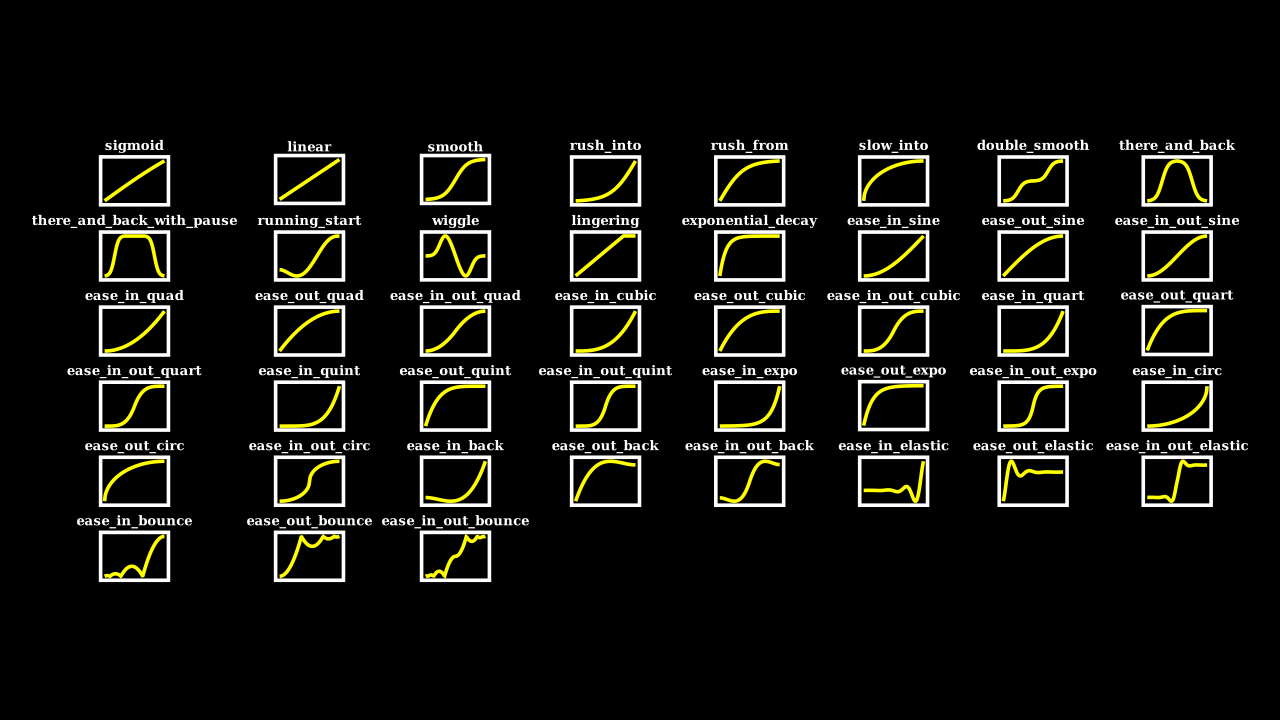

In [42]:
%%manim -qm -v WARNING RateFuncExample

class RateFuncExample(Scene):
    def construct(self):
        x = VGroup()
        for k, v in rate_functions.__dict__.items():
            if "function" in str(v):
                if (
                    not k.startswith("__")
                    and not k.startswith("sqrt")
                    and not k.startswith("bezier")
                ):
                    try:
                        rate_func = v
                        plot = (
                            ParametricFunction(
                                lambda x: [x, rate_func(x), 0],
                                t_range=[0, 1, .01],
                                use_smoothing=False,
                                color=YELLOW,
                            )
                            .stretch_to_fit_width(1.5)
                            .stretch_to_fit_height(1)
                        )
                        plot_bg = SurroundingRectangle(plot).set_color(WHITE)
                        plot_title = (
                            Text(rate_func.__name__, weight=BOLD)
                            .scale(0.5)
                            .next_to(plot_bg, UP, buff=0.1)
                        )
                        x.add(VGroup(plot_bg, plot, plot_title))
                    except: # because functions `not_quite_there`, `function squish_rate_func` are not working.
                        pass
        x.arrange_in_grid(cols=8)
        x.height = config.frame_height
        x.width = config.frame_width
        x.move_to(ORIGIN).scale(0.95)
        self.add(x)

In [42]:
%%manim -qm -v WARNING RateFunctions1Example

# https://docs.manim.community/en/stable/reference/manim.utils.rate_functions.html

class RateFunctions1Example(Scene):
    def construct(self):
        line1 = Line(3*LEFT, 3*RIGHT).shift(UP).set_color(RED)
        line2 = Line(3*LEFT, 3*RIGHT).set_color(GREEN)
        line3 = Line(3*LEFT, 3*RIGHT).shift(DOWN).set_color(BLUE)

        dot1 = Dot().move_to(line1.get_left())
        dot2 = Dot().move_to(line2.get_left())
        dot3 = Dot().move_to(line3.get_left())

        label1 = Tex("Ease In").next_to(line1, RIGHT)
        label2 = Tex("Ease out").next_to(line2, RIGHT)
        label3 = Tex("Ease In Out").next_to(line3, RIGHT)

        self.play(
            FadeIn(VGroup(line1, line2, line3)),
            FadeIn(VGroup(dot1, dot2, dot3)),
            Write(VGroup(label1, label2, label3)),
        )
        self.play(
            MoveAlongPath(dot1, line1, rate_func=rate_functions.ease_in_sine),
            MoveAlongPath(dot2, line2, rate_func=rate_functions.ease_out_sine),
            MoveAlongPath(dot3, line3, rate_func=rate_functions.ease_in_out_sine),
            run_time=7
        )
        self.wait()

In [44]:
# !ffmpeg -i ./media/videos/sagemath-examples/720p30/RateFunctions1Example.mp4 -y ./media/videos/sagemath-examples/720p30/RateFunctions1Example.gif 

<img src="./media/videos/sagemath-examples/720p30/RateFunctions1Example.gif" width="900" align="center">

In [43]:
%%manim -qm -v WARNING MovingVertices

class MovingVertices(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4]
        edges = [(1, 2), (2, 3), (3, 4), (1, 3), (1, 4)]
        g = Graph(vertices, edges)
        self.play(Create(g))
        self.wait()
        self.play(g[1].animate.move_to([1, 1, 0]),
                  g[2].animate.move_to([-1, 1, 0]),
                  g[3].animate.move_to([1, -1, 0]),
                  g[4].animate.move_to([-1, -1, 0]))
        self.wait()

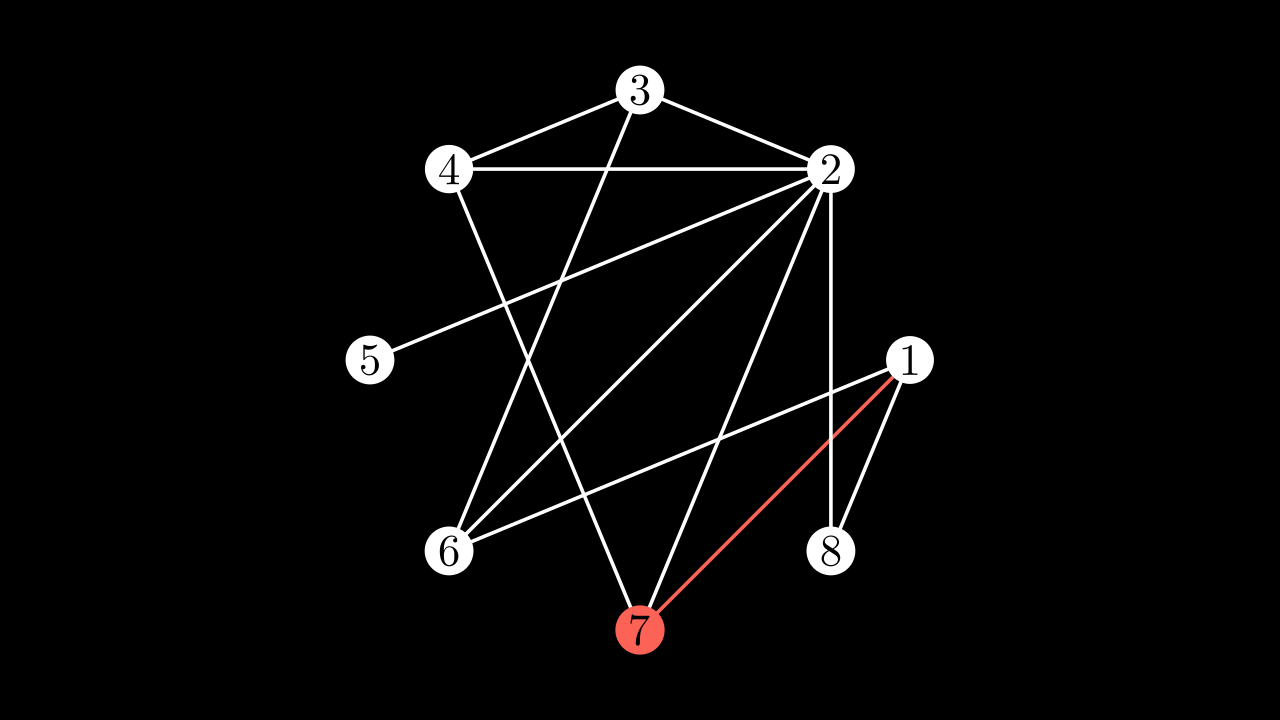

In [44]:
%%manim -qm -v WARNING LabeledModifiedGraph

class LabeledModifiedGraph(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5, 6, 7, 8]
        edges = [(1, 7), (1, 8), (2, 3), (2, 4), (2, 5),
                 (2, 8), (3, 4), (6, 1), (6, 2),
                 (6, 3), (7, 2), (7, 4)]
        g = Graph(vertices, edges, layout="circular", layout_scale=3,
                  labels=True, vertex_config={7: {"fill_color": RED}},
                  edge_config={(1, 7): {"stroke_color": RED},
                               (2, 7): {"stroke_color": RED},
                               (4, 7): {"stroke_color": RED}})
        self.add(g)

In [45]:
%%manim -qm -v WARNING Tree

import networkx as nx

class Tree(Scene):
    def construct(self):
        G = nx.Graph()

        G.add_node("ROOT")

        for i in range(5):
            G.add_node("Child_%i" % i)
            G.add_node("Grandchild_%i" % i)
            G.add_node("Greatgrandchild_%i" % i)

            G.add_edge("ROOT", "Child_%i" % i)
            G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
            G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

        self.play(Create(
            Graph(list(G.nodes), list(G.edges), layout="tree", root_vertex="ROOT")))

In [46]:
%%manim -qm -v WARNING ChangeGraphLayout

class ChangeGraphLayout(Scene):
    def construct(self):
        G = Graph([1, 2, 3, 4, 5], [(1, 2), (2, 3), (3, 4), (4, 5)],
                  layout={1: [-2, 0, 0], 2: [-1, 0, 0], 3: [0, 0, 0],
                          4: [1, 0, 0], 5: [2, 0, 0]}
                  )
        self.play(Create(G))
        self.play(G.animate.change_layout("circular"))
        self.wait()

In [47]:
%%manim -qm -v WARNING ImportNetworkxGraph

import networkx as nx

nxgraph = nx.erdos_renyi_graph(14, 0.5)

class ImportNetworkxGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(Create(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                    for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))


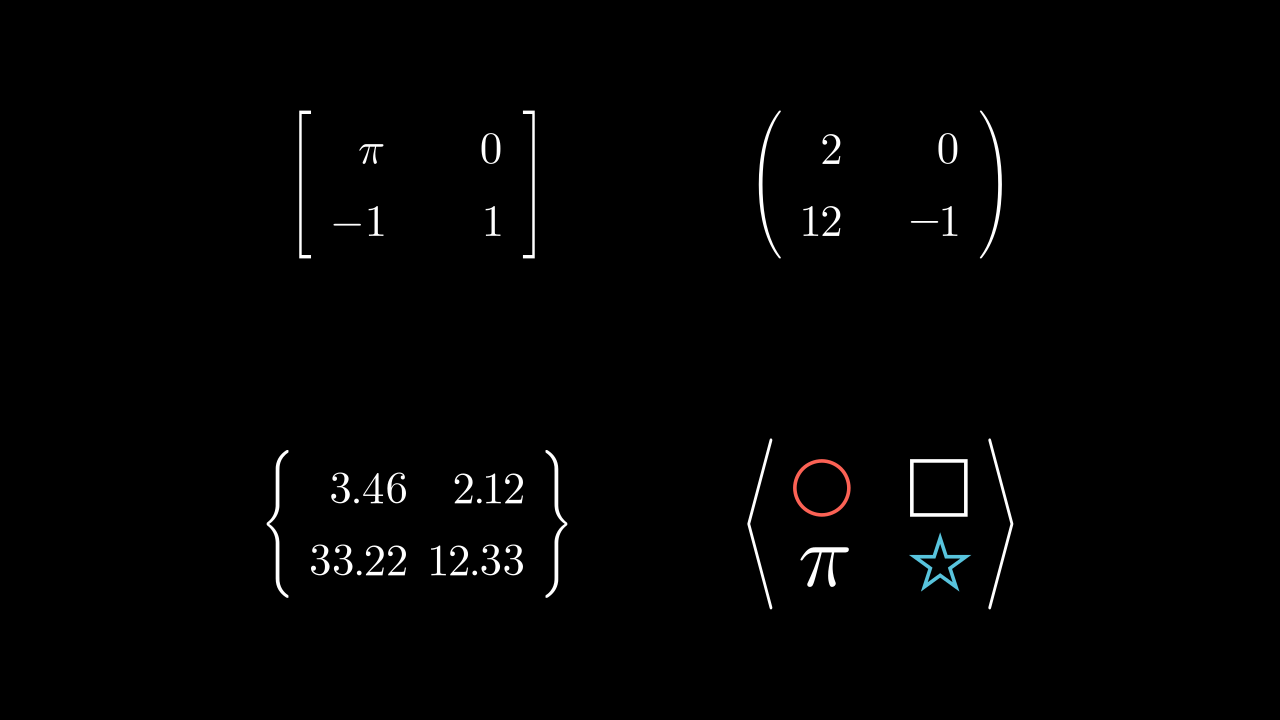

In [48]:
%%manim -qm -v WARNING MatrixExamples

class MatrixExamples(Scene):
    def construct(self):
        m0 = Matrix([["\\pi", 0], [-1, 1]])
        m1 = IntegerMatrix([[1.5, 0.], [12, -1.3]],
            left_bracket="(",
            right_bracket=")")
        m2 = DecimalMatrix(
            [[3.456, 2.122], [33.2244, 12.33]],
            element_to_mobject_config={"num_decimal_places": 2},
            left_bracket="\\{",
            right_bracket="\\}")
        m3 = MobjectMatrix(
            [[Circle().scale(0.3), Square().scale(0.3)],
            [MathTex("\\pi").scale(2), Star().scale(0.3)]],
            left_bracket="\\langle",
            right_bracket="\\rangle")
        g = Group(m0, m1, m2, m3).arrange_in_grid(buff=2)
        self.add(g)

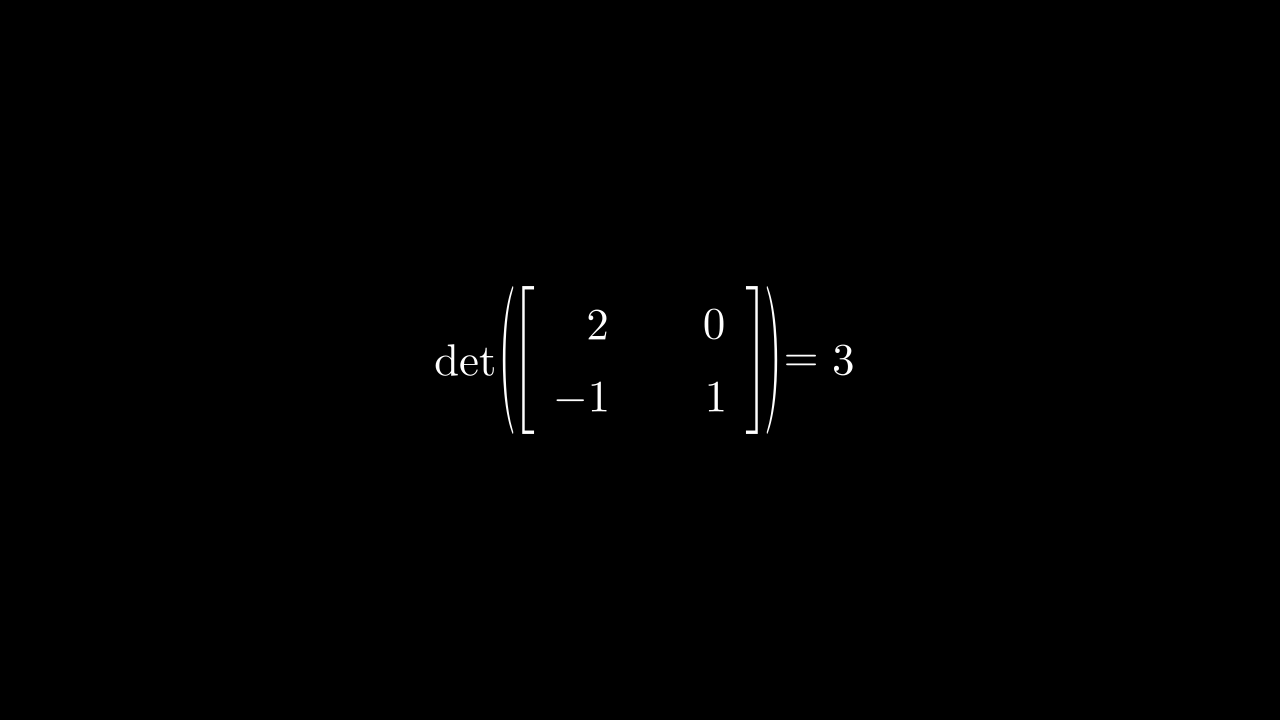

In [49]:
%%manim -qm -v WARNING DeterminantOfAMatrix

class DeterminantOfAMatrix(Scene):
    def construct(self):
        matrix = Matrix([
            [2, 0],
            [-1, 1]
        ])

        # scaling down the `det` string
        det = get_det_text(matrix,
                    determinant=3,
                    initial_scale_factor=1)

        # must add the matrix
        self.add(matrix)
        self.add(det)

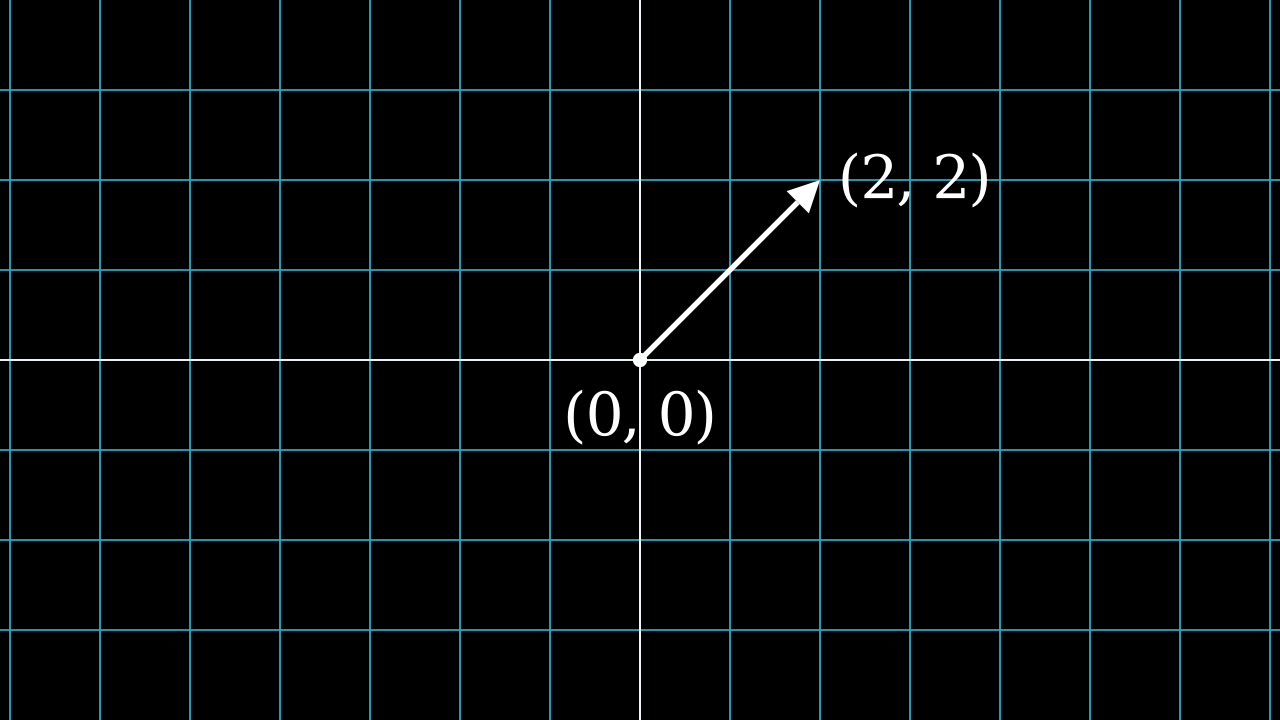

In [50]:
%%manim -qm -v WARNING VectorArrow

class VectorArrow(Scene):
    def construct(self):
        dot = Dot(ORIGIN)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)
        numberplane = NumberPlane()
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(numberplane, dot, arrow, origin_text, tip_text)
        

In [51]:
%%manim -qm -v WARNING PointMovingOnShapes

config.media_width = "95%"

class PointMovingOnShapes(Scene):
    def construct(self):
        circle = Circle(radius=1, color=BLUE)
        dot = Dot()
        dot2 = dot.copy().shift(RIGHT)
        self.add(dot)

        line = Line([3, 0, 0], [5, 0, 0])
        self.add(line)

        self.play(GrowFromCenter(circle))
        self.play(Transform(dot, dot2))
        self.play(MoveAlongPath(dot, circle), run_time=2, rate_func=linear)
        self.play(Rotating(dot, about_point=[2, 0, 0]), run_time=1.5)
        self.wait()
        

In [52]:
%%manim -qm -v WARNING MovingFrameBox

class MovingFrameBox(Scene):
    def construct(self):
        text=MathTex(
            "\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+",
            "g(x)\\frac{d}{dx}f(x)"
        )
        self.play(Write(text))
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(
            Create(framebox1),
        )
        self.wait()
        self.play(
            ReplacementTransform(framebox1,framebox2),
        )
        self.wait()

<string>:28: DeprecationWarning: invalid escape sequence '\p'
/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/graphing/number_line.py:475: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
  num_mob.shift(num_mob[0].get_width() * LEFT / 2)


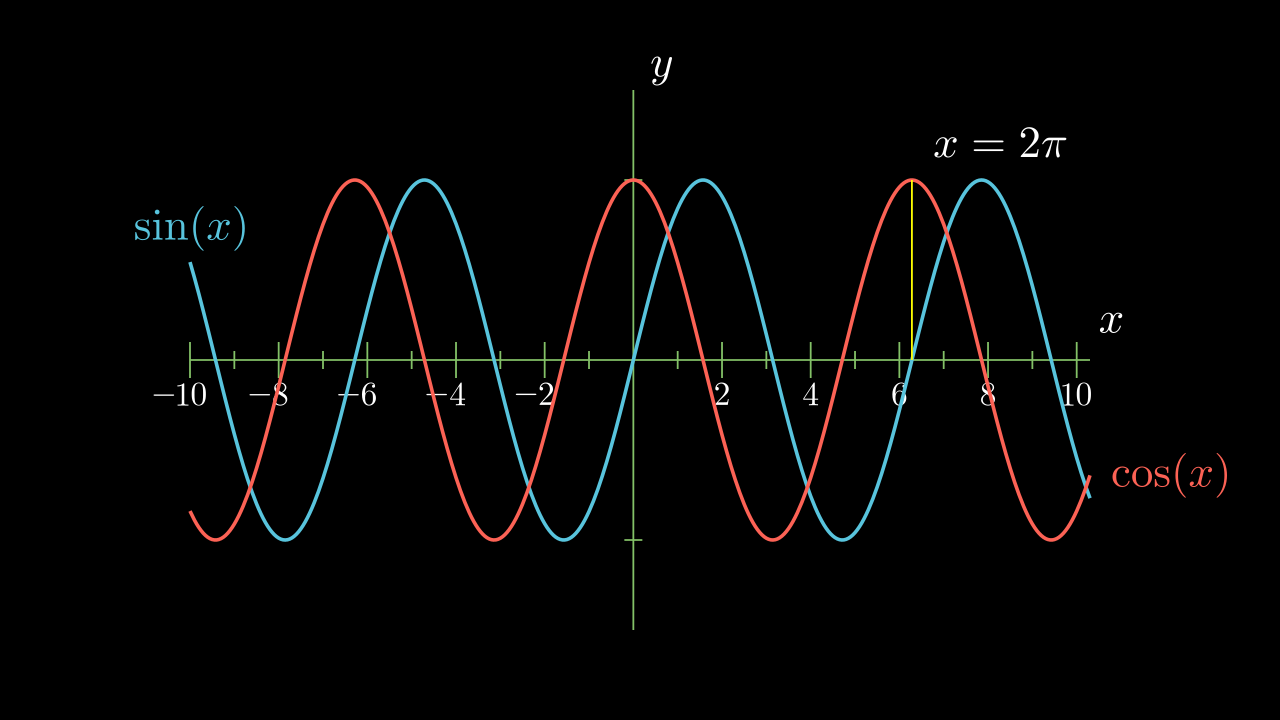

In [53]:
%%manim -qm -v WARNING SinAndCosFunctionPlot

class SinAndCosFunctionPlot(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-10, 10.3, 1],
            y_range=[-1.5, 1.5, 1],
            x_length=10,
            axis_config={"color": GREEN},
            x_axis_config={
                "numbers_to_include": np.arange(-10, 10.01, 2),
                "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2),
            },
            tips=False,
        )
        axes_labels = axes.get_axis_labels()
        sin_graph = axes.plot(lambda x: np.sin(x), color=BLUE)
        cos_graph = axes.plot(lambda x: np.cos(x), color=RED)

        sin_label = axes.get_graph_label(
            sin_graph, "\\sin(x)", x_val=-10, direction=UP / 2
        )
        cos_label = axes.get_graph_label(cos_graph, label="\\cos(x)")

        vert_line = axes.get_vertical_line(
            axes.i2gp(TAU, cos_graph), color=YELLOW, line_func=Line
        )
        line_label = axes.get_graph_label(
            cos_graph, "x=2\pi", x_val=TAU, direction=UR, color=WHITE
        )

        plot = VGroup(axes, sin_graph, cos_graph, vert_line)
        labels = VGroup(axes_labels, sin_label, cos_label, line_label)
        self.add(plot, labels)
        

/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/manim/mobject/value_tracker.py:74: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  self.set_points(np.zeros((1, 3)))


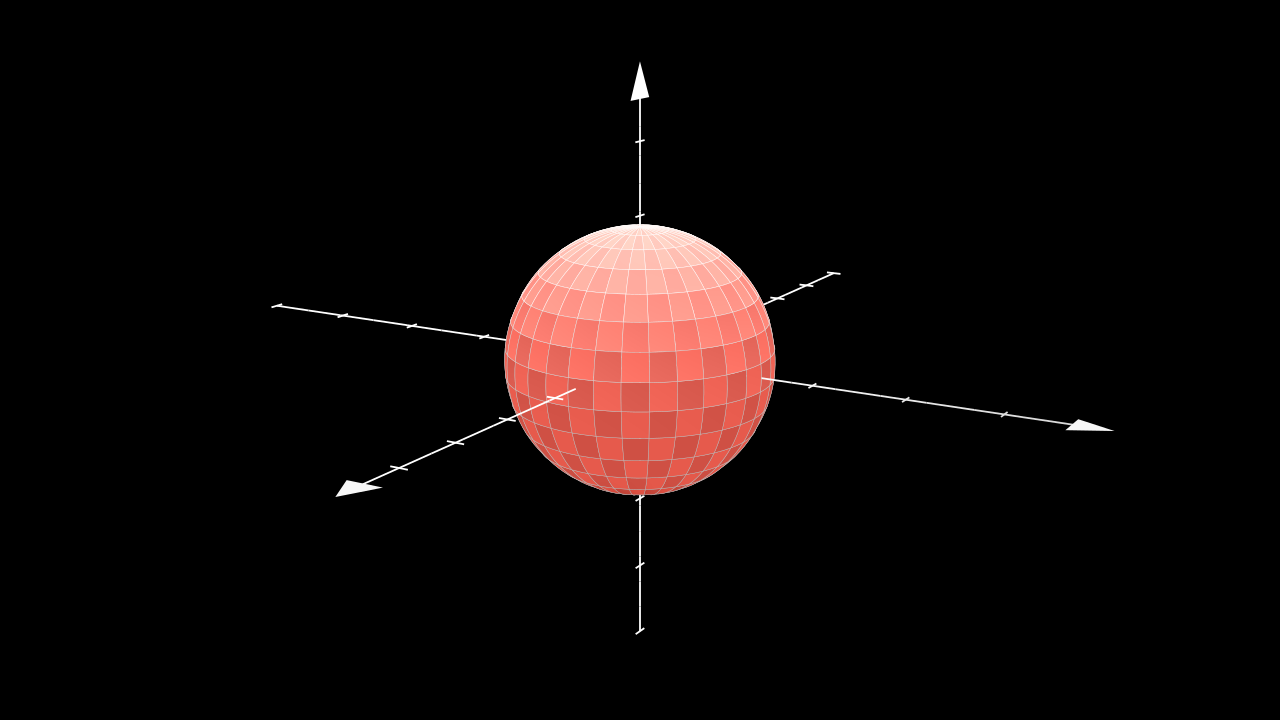

In [54]:
%%manim -qm -v WARNING ThreeDLightSourcePosition

class ThreeDLightSourcePosition(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        sphere = Surface(
            lambda u, v: np.array([
                1.5 * np.cos(u) * np.cos(v),
                1.5 * np.cos(u) * np.sin(v),
                1.5 * np.sin(u)
            ]), v_range=[0, TAU], u_range=[-PI / 2, PI / 2],
            checkerboard_colors=[RED_D, RED_E], resolution=(15, 32)
        )
        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, sphere)

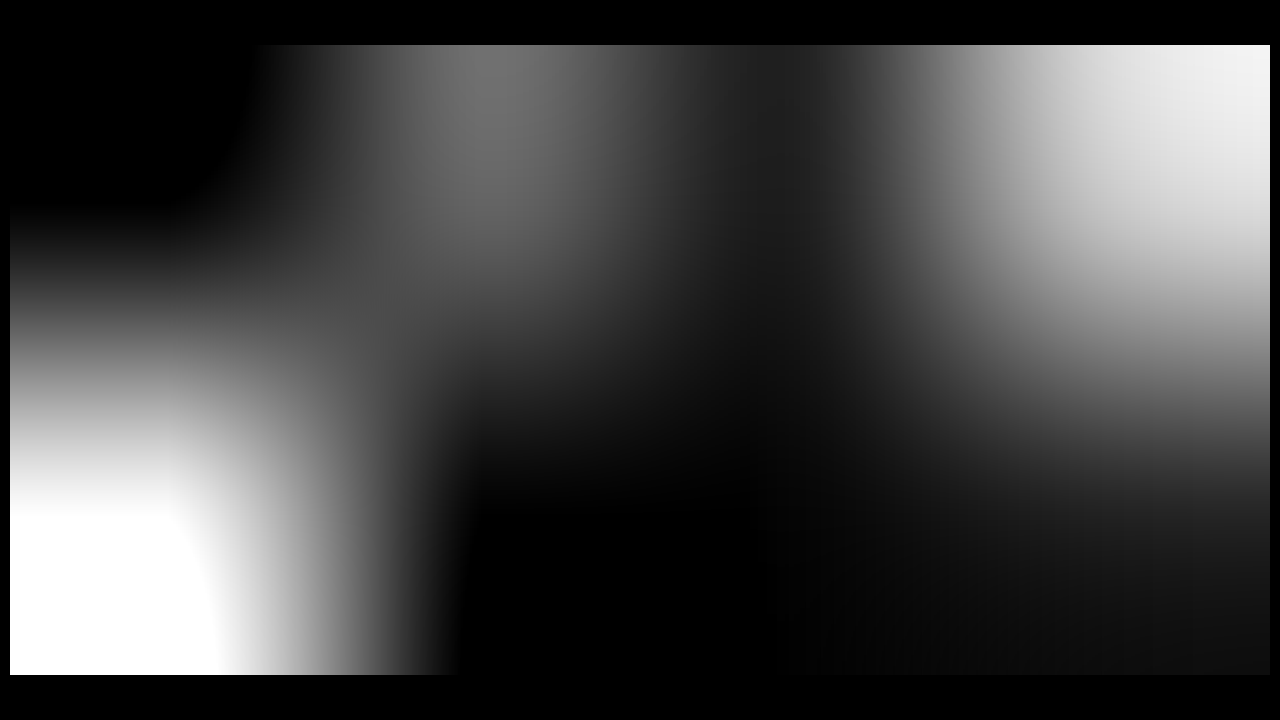

In [55]:
%%manim -qm -v WARNING ImageFromArray

class ImageFromArray(Scene):
    def construct(self):
        image = ImageMobject(np.uint8([[0, 100, 30, 200],
                                       [255, 0, 5, 33]]))
        image.height = 7
        self.add(image)

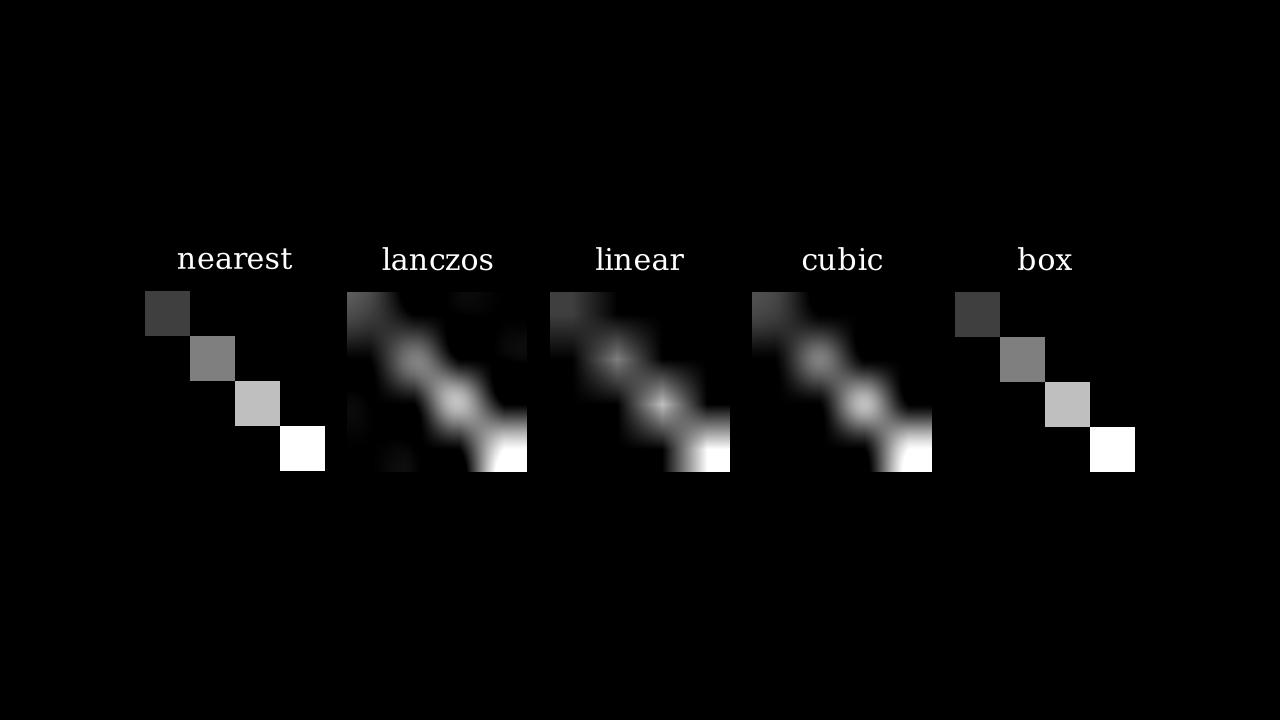

In [56]:
%%manim -qm -v WARNING ImageInterpolationEx

class ImageInterpolationEx(Scene):
    def construct(self):
        img = ImageMobject(np.uint8([[63, 0, 0, 0],
                                        [0, 127, 0, 0],
                                        [0, 0, 191, 0],
                                        [0, 0, 0, 255]
                                        ]))

        img.height = 2
        img1 = img.copy()
        img2 = img.copy()
        img3 = img.copy()
        img4 = img.copy()
        img5 = img.copy()

        img1.set_resampling_algorithm(RESAMPLING_ALGORITHMS["nearest"])
        img2.set_resampling_algorithm(RESAMPLING_ALGORITHMS["lanczos"])
        img3.set_resampling_algorithm(RESAMPLING_ALGORITHMS["linear"])
        img4.set_resampling_algorithm(RESAMPLING_ALGORITHMS["cubic"])
        img5.set_resampling_algorithm(RESAMPLING_ALGORITHMS["box"])
        img1.add(Text("nearest").scale(0.5).next_to(img1,UP))
        img2.add(Text("lanczos").scale(0.5).next_to(img2,UP))
        img3.add(Text("linear").scale(0.5).next_to(img3,UP))
        img4.add(Text("cubic").scale(0.5).next_to(img4,UP))
        img5.add(Text("box").scale(0.5).next_to(img5,UP))

        x= Group(img1,img2,img3,img4,img5)
        x.arrange()
        self.add(x)

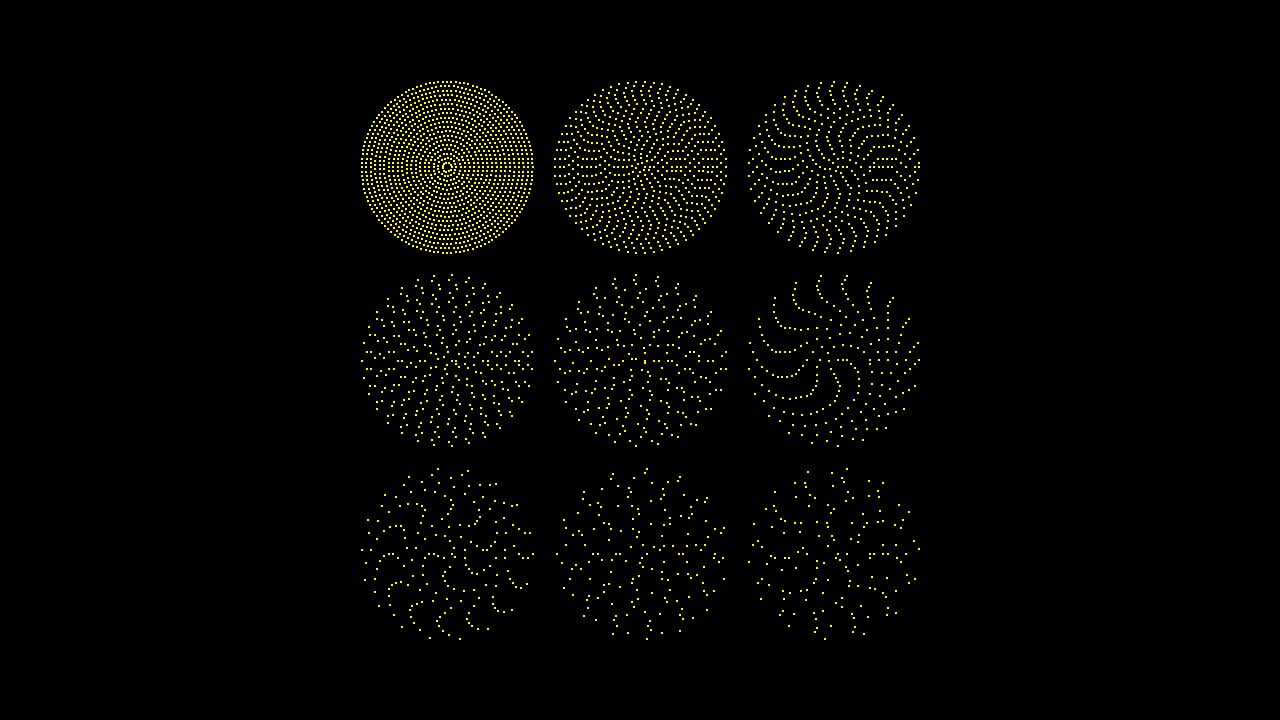

In [57]:
%%manim -qm -v WARNING PMobjectExample

class PMobjectExample(Scene):
    def construct(self):

        pG = PGroup()  # This is just a collection of PMobject's

        # As the scale factor increases, the number of points
        # removed increases.
        for sf in range(1, 9 + 1):
            p = PointCloudDot(density=20, radius=1).thin_out(sf)
            # PointCloudDot is a type of PMobject
            # and can therefore be added to a PGroup
            pG.add(p)

        # This organizes all the shapes in a grid.
        pG.arrange_in_grid()

        self.add(pG)

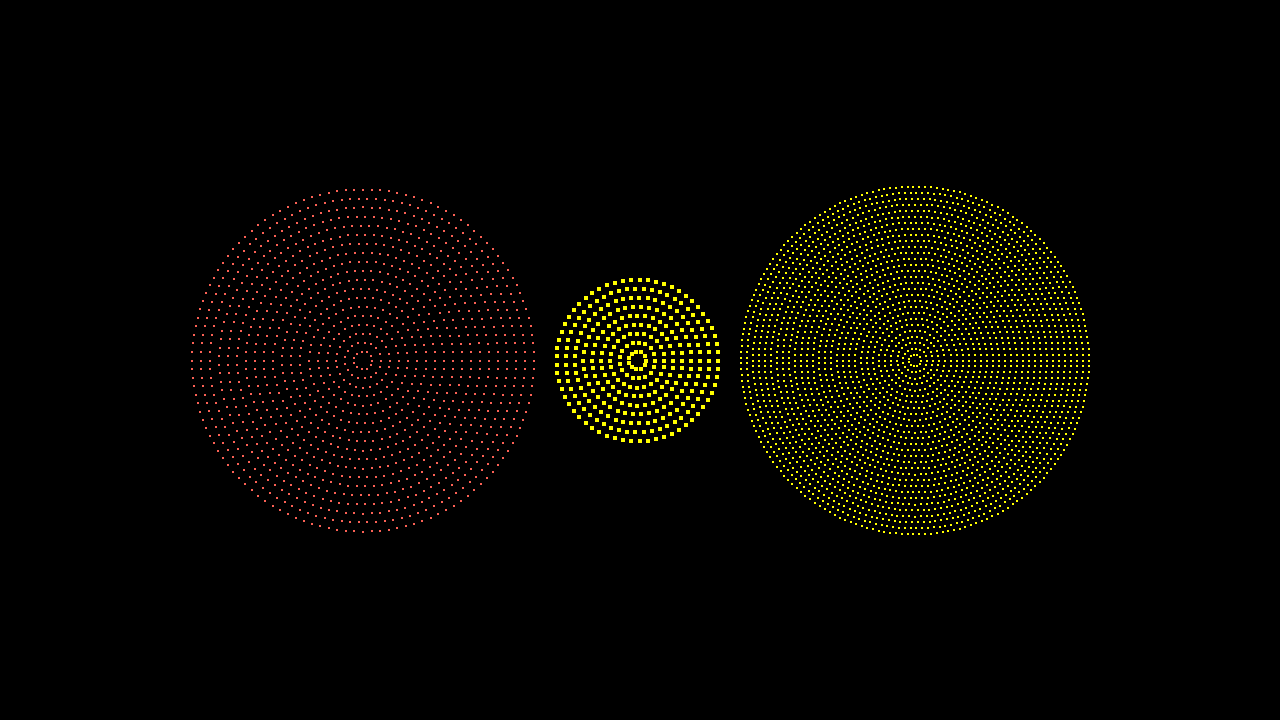

In [58]:
%%manim -qm -v WARNING PointCloudDotExample

class PointCloudDotExample(Scene):
    def construct(self):
        cloud_1 = PointCloudDot(color=RED)
        cloud_2 = PointCloudDot(stroke_width=4, radius=1)
        cloud_3 = PointCloudDot(density=15)

        group = Group(cloud_1, cloud_2, cloud_3).arrange()
        self.add(group)

In [59]:
%%manim -qm -v WARNING PointCloudDotExample2

class PointCloudDotExample2(Scene):
    def construct(self):
        plane = ComplexPlane()
        cloud = PointCloudDot(color=RED)
        self.add(
            plane, cloud
        )
        self.wait()
        self.play(
            cloud.animate.apply_complex_function(lambda z: np.exp(z))
        )

In [60]:
%%manim -qm -v WARNING StreamLineCreation

class StreamLineCreation(Scene):
    def construct(self):
        func = lambda pos: (pos[0] * UR + pos[1] * LEFT) - pos
        stream_lines = StreamLines(
            func,
            color=YELLOW,
            x_range=[-7, 7, 1],
            y_range=[-4, 4, 1],
            stroke_width=3,
            virtual_time=1,  # use shorter lines
            max_anchors_per_line=5,  # better performance with fewer anchors
        )
        self.play(stream_lines.create())  # uses virtual_time as run_time
        self.wait()

In [61]:
%%manim -qm -v WARNING EndAnimation

class EndAnimation(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[0] / 2) * UR + np.cos(pos[1] / 2) * LEFT
        stream_lines = StreamLines(
            func, stroke_width=3, max_anchors_per_line=5, virtual_time=1, color=BLUE
        )
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5, time_width=0.5)
        self.wait(1)
        self.play(stream_lines.end_animation())

In [62]:
%%manim -qm -v WARNING ContinuousMotion

class ContinuousMotion(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[0] / 2) * UR + np.cos(pos[1] / 2) * LEFT
        stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(stream_lines.virtual_time / stream_lines.flow_speed)

In [63]:
%%manim -qm -v WARNING Nudging

class Nudging(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[1] / 2) * RIGHT + np.cos(pos[0] / 2) * UP
        vector_field = ArrowVectorField(
            func, x_range=[-7, 7, 1], y_range=[-4, 4, 1], length_func=lambda x: x / 2
        )
        self.add(vector_field)
        circle = Circle(radius=2).shift(LEFT)
        self.add(circle.copy().set_color(GRAY))
        dot = Dot().move_to(circle)

        vector_field.nudge(circle, -2, 60, True)
        vector_field.nudge(dot, -2, 60)

        circle.add_updater(vector_field.get_nudge_updater(pointwise=True))
        dot.add_updater(vector_field.get_nudge_updater())
        self.add(circle, dot)
        self.wait(6)

In [64]:
%%manim -qm -v WARNING ScaleVectorFieldFunction

class ScaleVectorFieldFunction(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[1]) * RIGHT + np.cos(pos[0]) * UP
        vector_field = ArrowVectorField(func)
        self.add(vector_field)
        self.wait()

        func = VectorField.scale_func(func, 0.5)
        self.play(vector_field.animate.become(ArrowVectorField(func)))
        self.wait()

**Advanced projects**

In [65]:
%%manim -qm -v WARNING SineCurveUnitCircle

from manim import *

class SineCurveUnitCircle(Scene):
    # contributed by heejin_park, https://infograph.tistory.com/230
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dot_and_draw_curve()
        self.wait()

    def show_axis(self):
        x_start = np.array([-6,0,0])
        x_end = np.array([6,0,0])

        y_start = np.array([-4,-2,0])
        y_end = np.array([-4,2,0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        self.add(x_axis, y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4,0,0])
        self.curve_start = np.array([-3,0,0])

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2*i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        circle = Circle(radius=1)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dot_and_draw_curve(self):
        orbit = self.circle
        origin_point = self.origin_point

        dot = Dot(radius=0.08, color=YELLOW)
        dot.move_to(orbit.point_from_proportion(0))
        self.t_offset = 0
        rate = 0.25

        def go_around_circle(mob, dt):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def get_line_to_circle():
            return Line(origin_point, dot.get_center(), color=BLUE)

        def get_line_to_curve():
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x,y,0]), color=YELLOW_A, stroke_width=2 )


        self.curve = VGroup()
        self.curve.add(Line(self.curve_start,self.curve_start))
        def get_curve():
            last_line = self.curve[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(),np.array([x,y,0]), color=YELLOW_D)
            self.curve.add(new_line)

            return self.curve

        dot.add_updater(go_around_circle)

        origin_to_circle_line = always_redraw(get_line_to_circle)
        dot_to_curve_line = always_redraw(get_line_to_curve)
        sine_curve_line = always_redraw(get_curve)

        self.add(dot)
        self.add(orbit, origin_to_circle_line, dot_to_curve_line, sine_curve_line)
        self.wait(8.5)

        dot.remove_updater(go_around_circle)

<string>:30: DeprecationWarning: invalid escape sequence '\p'
<string>:30: DeprecationWarning: invalid escape sequence '\p'
<string>:31: DeprecationWarning: invalid escape sequence '\p'
<string>:31: DeprecationWarning: invalid escape sequence '\p'
